In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:/Data Science/Projects/Python_projects/Loan_data_analysis_project/Loan_dataset.csv')

In [3]:
df

Loan ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
1       4771cc26-131a-45db-b5aa-537ea4ba5342   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4       d4062e70-befa-4995-8643-a0de73938182   
...                                      ...   
100509                                   NaN   
100510                                   NaN   
100511                                   NaN   
100512                                   NaN   
100513                                   NaN   

                                 Customer ID Loan Status  Current Loan Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1       2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid           99999999.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4       81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
...                                      ...         ...                  ...   
100509                                   NaN         NaN                  NaN   
100510                                   NaN         NaN                  NaN   
100511                                   NaN         NaN                  NaN   
100512                                   NaN         NaN                  NaN   
100513                                   NaN         NaN                  NaN   

              Term  Credit Score  Annual Income Years in current job  \
0       Short Term         709.0      1167493.0              8 years   
1       Short Term           NaN            NaN            10+ years   
2       Short Term         741.0      2231892.0              8 years   
3        Long Term         721.0       806949.0              3 years   
4       Short Term           NaN            NaN              5 years   
...            ...           ...            ...                  ...   
100509         NaN           NaN            NaN                  NaN   
100510         NaN           NaN            NaN                  NaN   
100511         NaN           NaN            NaN                  NaN   
100512         NaN           NaN            NaN                  NaN   
100513         NaN           NaN            NaN                  NaN   

       Home Ownership             Purpose  Monthly Debt  \
0       Home Mortgage   Home Improvements       5214.74   
1       Home Mortgage  Debt Consolidation      33295.98   
2            Own Home  Debt Consolidation      29200.53   
3            Own Home  Debt Consolidation       8741.90   
4                Rent  Debt Consolidation      20639.70   
...               ...                 ...           ...   
100509            NaN                 NaN           NaN   
100510            NaN                 NaN           NaN   
100511            NaN                 NaN           NaN   
100512            NaN                 NaN           NaN   
100513            NaN                 NaN           NaN   

        Years of Credit History  Months since last delinquent  \
0                          17.2                           NaN   
1                          21.1                           8.0   
2                          14.9                          29.0   
3                          12.0                           NaN   
4                           6.1                           NaN   
...                         ...                           ...   
100509                      NaN                           NaN   
100510                      NaN                           NaN   
100511                      NaN                           NaN   
100512                      NaN                           NaN   
100513                      NaN                           NaN   

        Number of Open Accounts  Number of Credit Problems  \
0                           6.0                        1.0   
1       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## 1) What is the average current loan amount for each loan status?

In [7]:
df['Current Loan Amount'].unique()

array([  445412.,   262328., 99999999., ...,   100254.,   274076.,
             nan])

In [8]:
value_counts = df['Current Loan Amount'].value_counts()

In [9]:
sorted_value_counts = value_counts.sort_index()     

# Sorting Values

In [10]:
print(pd.DataFrame(sorted_value_counts))

                     count
Current Loan Amount       
10802.0                  1
11242.0                  1
15422.0                  2
21098.0                  1
21450.0                  3
...                    ...
789030.0                 9
789096.0                16
789184.0                 6
789250.0                 3
99999999.0           11484

[22004 rows x 1 columns]


### The value "99999999" appears a lot of times in the data.
### It is a huge number, plus lot of people having the same number would mean either they have a huge loan pending or they paid it off 
### First, we check whether this amount an outstanding amount or a paid amount

In [12]:
condition = df['Current Loan Amount'] == 99999999

In [13]:
filtered_loans = df[condition][['Current Loan Amount','Loan Status']]

In [14]:
filtered_loans['Current Loan Amount'].unique()

array([99999999.])

In [15]:
filtered_loans['Loan Status'].unique()

array(['Fully Paid'], dtype=object)

### As we deduced, all the "99999999" amount is Fully Paid 
### Hence, we conclude this as an amount that is already paid 
### and this amount has to be '0' rather than '99999999'

In [17]:
# Replacing '99999999' with 0

df = df.replace(99999999,0)

In [18]:
df['Current Loan Amount'].unique()

array([445412., 262328.,      0., ..., 100254., 274076.,     nan])

In [19]:
df['Current Loan Amount'].isna().unique()     

# To Check null values

array([False,  True])

In [20]:
df1= df.dropna(subset='Current Loan Amount')  

# Creating a New DataFrame and removing all the null values 

In [21]:
df1['Current Loan Amount'].isna().unique()     

# To Recheck null values

array([False])

In [22]:
df1 = df1[df1['Current Loan Amount'] != 0]     

# Removing all the values that are "Fully Paid"

### Numeric Representation

In [24]:
pd.DataFrame(df1['Current Loan Amount'].groupby(by=df1['Loan Status']).mean().round(2))

Current Loan Amount
Loan Status                     
Charged Off            324975.23
Fully Paid             307962.36

### Graphical Representation

In [26]:
Average_Loan_Amounts = df1.groupby('Loan Status')['Current Loan Amount'].mean().round(2).reset_index()

# To Create a DataFrame

In [27]:
Average_Loan_Amounts

Loan Status  Current Loan Amount
0  Charged Off            324975.23
1   Fully Paid            307962.36

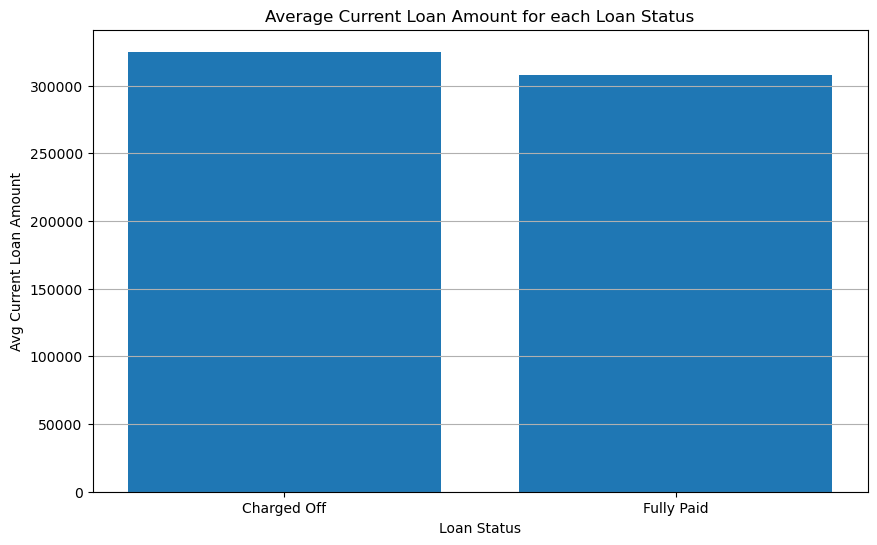

In [28]:
plt.figure(figsize=(10,6))
plt.bar(data=Average_Loan_Amounts, x='Loan Status', height='Current Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Avg Current Loan Amount')
plt.grid(axis='y')  # Grid lines for better readability
plt.title('Average Current Loan Amount for each Loan Status')
plt.show()

## 2) How does the credit score vary with the annual income?

In [30]:
df['Credit Score'].unique() 

# Checking values

array([ 709.,   nan,  741.,  721., 7290.,  730.,  678.,  739.,  728.,
        740.,  743.,  727.,  723.,  747.,  687.,  750.,  714.,  724.,
        704.,  688.,  749.,  746.,  737.,  729.,  733.,  725.,  745.,
        720.,  718.,  682., 7120.,  680.,  710.,  598.,  719., 6610.,
        652.,  736., 7380.,  644.,  672., 7370.,  699.,  751.,  694.,
        675.,  657.,  748.,  666.,  734.,  742.,  705.,  731., 6240.,
        712.,  685.,  717.,  722.,  618.,  676.,  692., 7210.,  732.,
        649.,  695.,  744.,  686.,  637.,  697.,  706.,  715.,  707.,
        726.,  738., 7500.,  716., 7020.,  651.,  708.,  698.,  689.,
        735.,  703.,  693., 7080.,  645.,  691.,  673.,  700., 7140.,
        658.,  674.,  654., 7490.,  681.,  696.,  713.,  668., 7360.,
        659., 7160.,  647.,  683.,  670.,  623.,  711.,  639.,  671.,
       6990.,  614.,  667.,  701., 7410., 7310., 7040., 7060.,  615.,
       7200.,  656.,  653.,  664.,  613., 7450., 7300.,  636.,  702.,
       7430.,  594.,

### The highest credit score for the US is 850. 
### Some numbers above 1000. But all of them have one thing in common.

In [32]:
filtered_values = df['Credit Score'][df['Credit Score']>1000]

In [33]:
filtered_values

5        7290.0
43       7120.0
51       6610.0
56       7380.0
65       7370.0
          ...  
99851    7420.0
99872    7070.0
99906    6880.0
99944    6790.0
99947    6940.0
Name: Credit Score, Length: 4551, dtype: float64

In [34]:
sorted_values = filtered_values.sort_values()

In [35]:
sorted_values.astype('int').unique()

array([5850, 5860, 5890, 5900, 5920, 5930, 5940, 5950, 5960, 6010, 6050,
       6060, 6070, 6080, 6090, 6100, 6110, 6120, 6130, 6140, 6150, 6160,
       6170, 6180, 6190, 6200, 6210, 6220, 6230, 6240, 6250, 6260, 6270,
       6280, 6290, 6300, 6310, 6320, 6330, 6340, 6350, 6360, 6370, 6380,
       6390, 6400, 6410, 6420, 6430, 6440, 6450, 6460, 6470, 6480, 6490,
       6500, 6510, 6520, 6530, 6540, 6550, 6560, 6570, 6580, 6590, 6600,
       6610, 6620, 6630, 6640, 6650, 6660, 6670, 6680, 6690, 6700, 6710,
       6720, 6730, 6740, 6750, 6760, 6770, 6780, 6790, 6800, 6810, 6820,
       6830, 6840, 6850, 6860, 6870, 6880, 6890, 6900, 6910, 6920, 6930,
       6940, 6950, 6960, 6970, 6980, 6990, 7000, 7010, 7020, 7030, 7040,
       7050, 7060, 7070, 7080, 7090, 7100, 7110, 7120, 7130, 7140, 7150,
       7160, 7170, 7180, 7190, 7200, 7210, 7220, 7230, 7240, 7250, 7260,
       7270, 7280, 7290, 7300, 7310, 7320, 7330, 7340, 7350, 7360, 7370,
       7380, 7390, 7400, 7410, 7420, 7430, 7440, 74

### They are divisible by 10 and less than 850.
### So there most likely is a data error.
### Hence assuming this, we divide those numbers by 10.

In [37]:
Col_to_mod = 'Credit Score'           

In [38]:
df.loc[df[Col_to_mod]>1000,Col_to_mod]/=10  

# Divide only the numbers > 1000 in the specified column by 10

In [39]:
df['Credit Score'].unique()  # To check data and null values

array([709.,  nan, 741., 721., 729., 730., 678., 739., 728., 740., 743.,
       727., 723., 747., 687., 750., 714., 724., 704., 688., 749., 746.,
       737., 733., 725., 745., 720., 718., 682., 712., 680., 710., 598.,
       719., 661., 652., 736., 738., 644., 672., 699., 751., 694., 675.,
       657., 748., 666., 734., 742., 705., 731., 624., 685., 717., 722.,
       618., 676., 692., 732., 649., 695., 744., 686., 637., 697., 706.,
       715., 707., 726., 716., 702., 651., 708., 698., 689., 735., 703.,
       693., 645., 691., 673., 700., 658., 674., 654., 681., 696., 713.,
       668., 659., 647., 683., 670., 623., 711., 639., 671., 614., 667.,
       701., 615., 656., 653., 664., 613., 636., 594., 646., 669., 612.,
       690., 641., 665., 677., 684., 655., 630., 663., 638., 596., 660.,
       679., 609., 603., 643., 633., 586., 629., 648., 640., 625., 635.,
       662., 627., 611., 604., 642., 621., 632., 602., 616., 600., 650.,
       597., 622., 610., 619., 628., 599., 606., 60

In [40]:
df2= df.dropna(subset='Credit Score')  

# Creating a New DataFrame and removing all the null values 

In [41]:
df2['Credit Score'].unique()

# To check null values as well as updated values

array([709., 741., 721., 729., 730., 678., 739., 728., 740., 743., 727.,
       723., 747., 687., 750., 714., 724., 704., 688., 749., 746., 737.,
       733., 725., 745., 720., 718., 682., 712., 680., 710., 598., 719.,
       661., 652., 736., 738., 644., 672., 699., 751., 694., 675., 657.,
       748., 666., 734., 742., 705., 731., 624., 685., 717., 722., 618.,
       676., 692., 732., 649., 695., 744., 686., 637., 697., 706., 715.,
       707., 726., 716., 702., 651., 708., 698., 689., 735., 703., 693.,
       645., 691., 673., 700., 658., 674., 654., 681., 696., 713., 668.,
       659., 647., 683., 670., 623., 711., 639., 671., 614., 667., 701.,
       615., 656., 653., 664., 613., 636., 594., 646., 669., 612., 690.,
       641., 665., 677., 684., 655., 630., 663., 638., 596., 660., 679.,
       609., 603., 643., 633., 586., 629., 648., 640., 625., 635., 662.,
       627., 611., 604., 642., 621., 632., 602., 616., 600., 650., 597.,
       622., 610., 619., 628., 599., 606., 608., 62

In [42]:
df2['Annual Income'].isna().unique()     

# To Check null values

array([False])

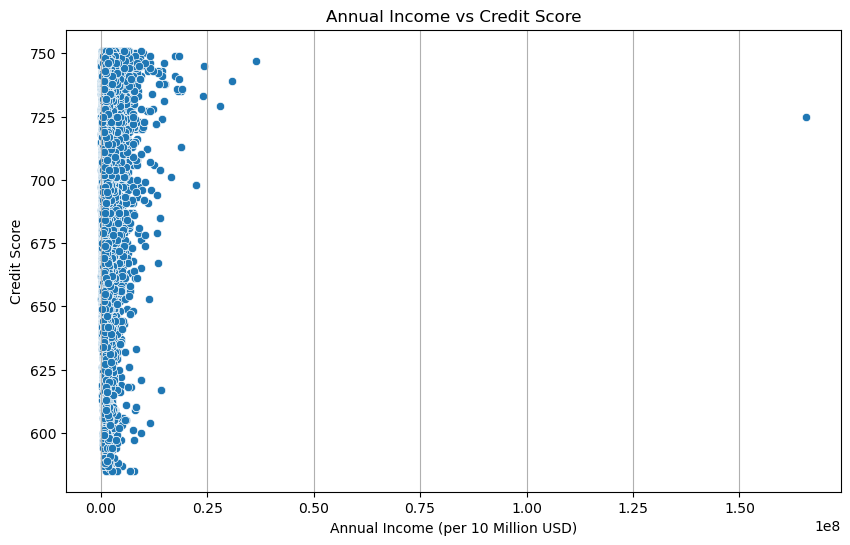

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Annual Income',y='Credit Score')
plt.grid(axis='x')  # Grid Lines for better readability
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Credit Score')
plt.title('Annual Income vs Credit Score')
plt.show()

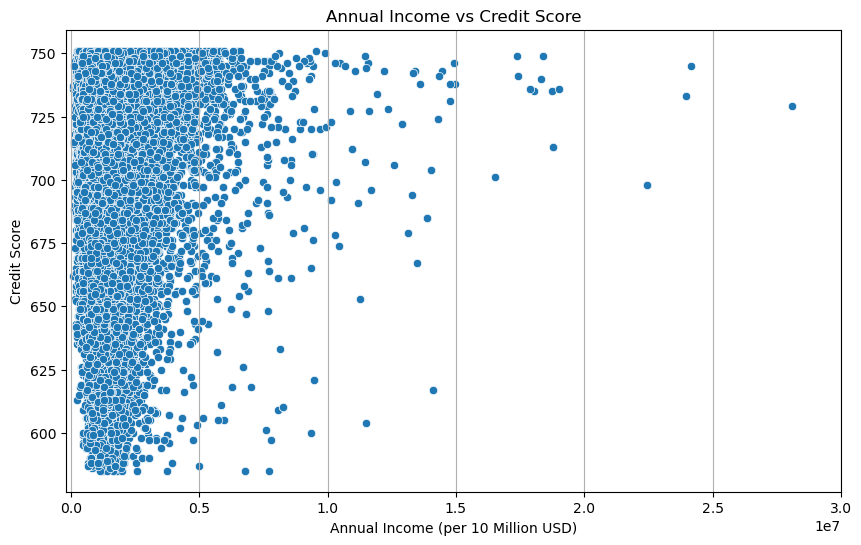

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Annual Income',y='Credit Score')
plt.xlim(-200000,30000000)     # To not include outliers
plt.xlabel('Annual Income (per 10 Million USD)') 
plt.ylabel('Credit Score')
plt.grid(axis='x')  # Grid Lines for better readability
plt.title('Annual Income vs Credit Score')
plt.show()

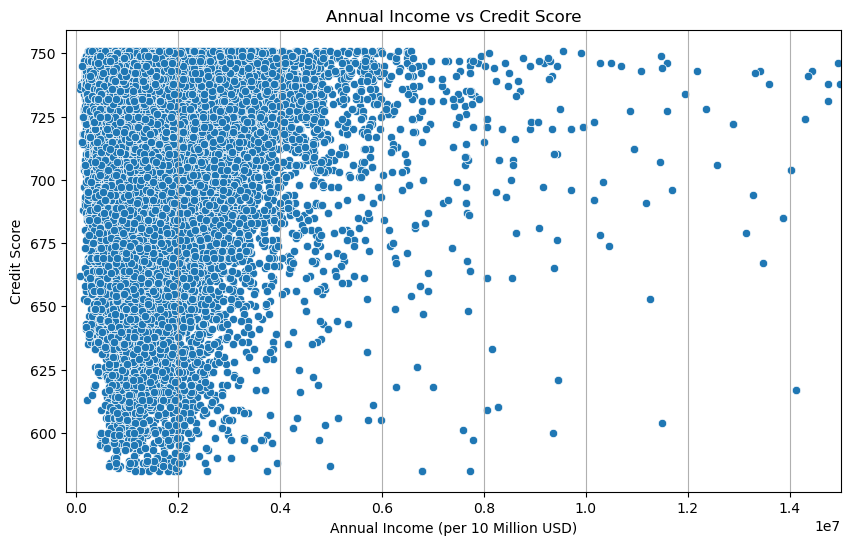

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Annual Income',y='Credit Score')
plt.xlim(-200000,15000000)     # To not include outliers
plt.xlabel('Annual Income (per 10 Million USD)') 
plt.ylabel('Credit Score')
plt.grid(axis='x')  # Grid Lines for better readability
plt.title('Annual Income vs Credit Score')
plt.show()

In [46]:
df2[['Credit Score','Annual Income']].corr()

Credit Score  Annual Income
Credit Score       1.000000      -0.005092
Annual Income     -0.005092       1.000000

In [47]:
pd.DataFrame(df2[['Credit Score','Annual Income']].var().round(2))

0
Credit Score   8.007300e+02
Annual Income  1.169340e+12

In [48]:
pd.DataFrame(df2[['Credit Score','Annual Income']].std().round(2))

0
Credit Score        28.3
Annual Income  1081360.2

In [49]:
df2 = df2[df2['Annual Income'] < 10000000]   

# To remove Outliers

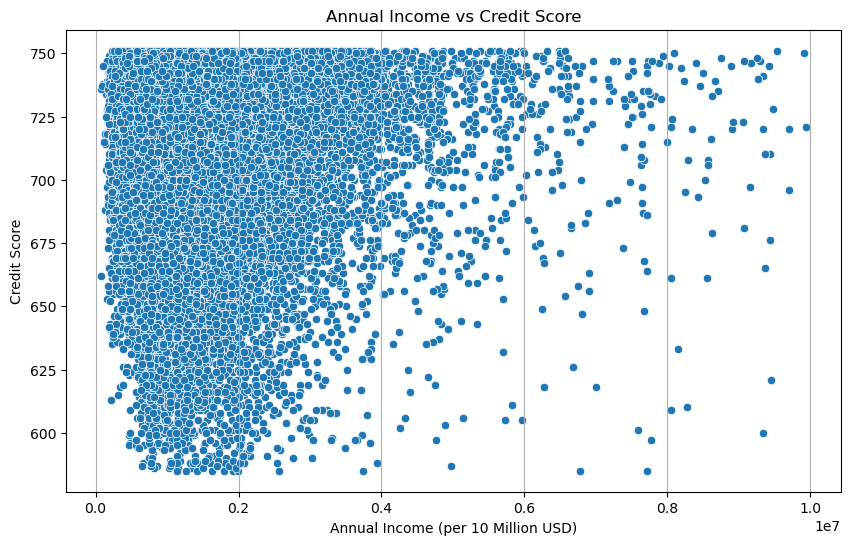

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Annual Income',y='Credit Score')
plt.grid(axis='x')  # Grid Lines for better readability
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Credit Score')
plt.title('Annual Income vs Credit Score')
plt.show()

In [51]:
df2[['Credit Score','Annual Income']].corr()

Credit Score  Annual Income
Credit Score       1.000000      -0.008833
Annual Income     -0.008833       1.000000

In [52]:
pd.DataFrame(df2[['Credit Score','Annual Income']].var().round(2))

0
Credit Score   8.005300e+02
Annual Income  6.649314e+11

In [53]:
pd.DataFrame(df2[['Credit Score','Annual Income']].std().round(2))

0
Credit Score       28.29
Annual Income  815433.24

In [54]:
df2= df.dropna(subset='Credit Score')  

# Reverting this Dataframe for further use

## 3) Is there a correlation between the number of open accounts and the current credit balance?

In [56]:
df['Number of Open Accounts'].isna().unique()    

# To check null values 

array([False,  True])

In [57]:
df3 = df.dropna(subset='Number of Open Accounts')

# Creating a New DataFrame and removing all the null values

In [58]:
df3['Number of Open Accounts'].isna().unique()   

# To recheck null values     

array([False])

In [59]:
df3['Current Credit Balance'].isna().unique()  

# To check null values

array([False])

In [60]:
df3['Current Credit Balance'].max()    

# To determine the range

32878968.0

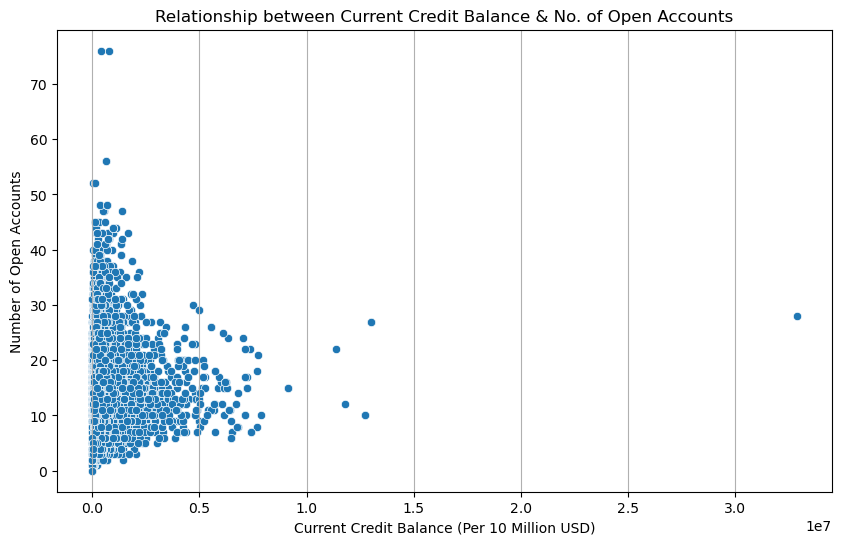

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df3,x='Current Credit Balance',y='Number of Open Accounts')
plt.xlabel('Current Credit Balance (Per 10 Million USD)')
plt.ylabel('Number of Open Accounts')
plt.grid(axis='x')  # Grid Lines for better readability
plt.title('Relationship between Current Credit Balance & No. of Open Accounts')
plt.show()

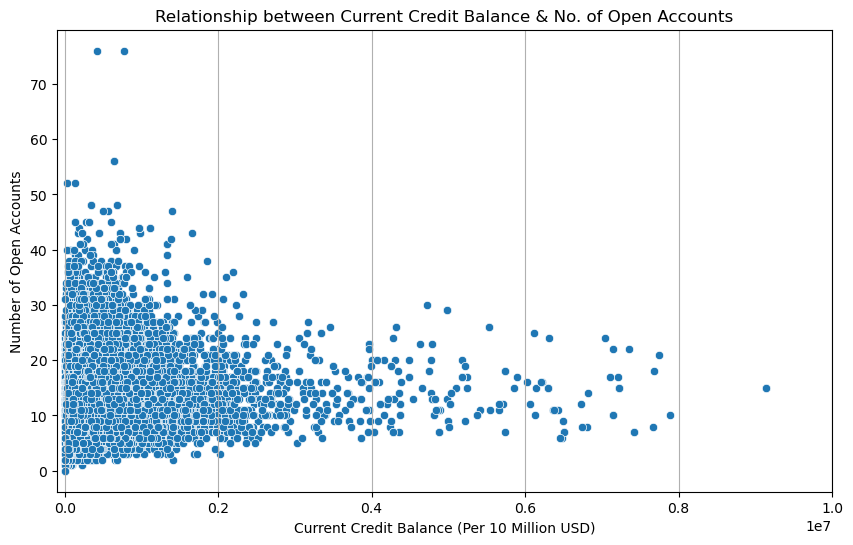

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df3,x='Current Credit Balance',y='Number of Open Accounts')
plt.xlim(-100000,10000000)  # To not include outliers
plt.xlabel('Current Credit Balance (Per 10 Million USD)')
plt.ylabel('Number of Open Accounts')
plt.grid(axis='x')  # Grid Lines for better readability
plt.title('Relationship between Current Credit Balance & No. of Open Accounts')
plt.show()

In [63]:
df3[['Number of Open Accounts','Current Credit Balance']].corr()

Number of Open Accounts  Current Credit Balance
Number of Open Accounts                 1.000000                0.228136
Current Credit Balance                  0.228136                1.000000

In [64]:
df3 = df3[df3['Current Credit Balance'] < 10000000]   

# To remove Outliers

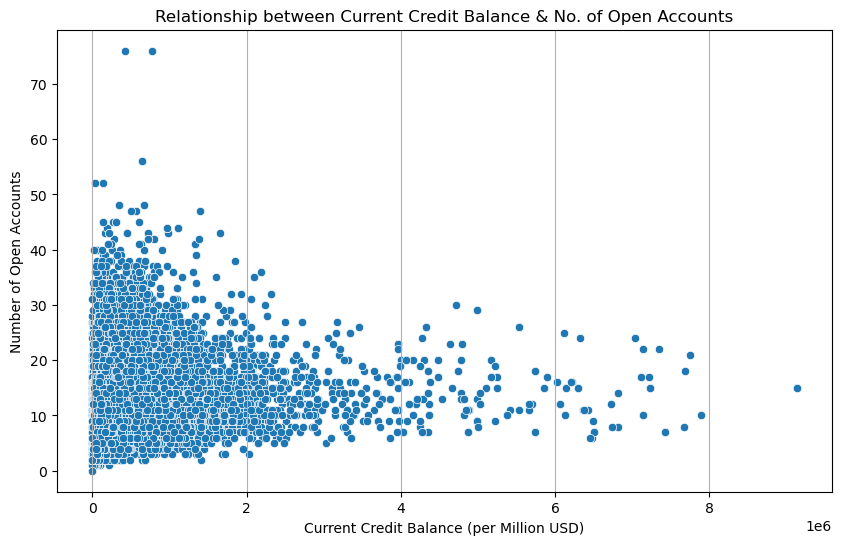

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Current Credit Balance',y='Number of Open Accounts',data=df3)
plt.xlabel('Current Credit Balance (per Million USD)')
plt.ylabel('Number of Open Accounts')
plt.grid(axis='x')  # Grid Lines for better readability
plt.title('Relationship between Current Credit Balance & No. of Open Accounts')
plt.show()

In [66]:
df3[['Number of Open Accounts','Current Credit Balance']].corr()

Number of Open Accounts  Current Credit Balance
Number of Open Accounts                 1.000000                0.239696
Current Credit Balance                  0.239696                1.000000

### As the Correlation between Number of Open Accounts and Current Credit Balance is 0.239696, the correlation between them is on a weaker side

## 4) What is the distribution of credit scores across different home ownership types?

In [69]:
df2['Credit Score'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [70]:
df2['Home Ownership'].isna().unique()     

# Using already made up DataFrame and checking null values

array([False])

### Graphical Representation

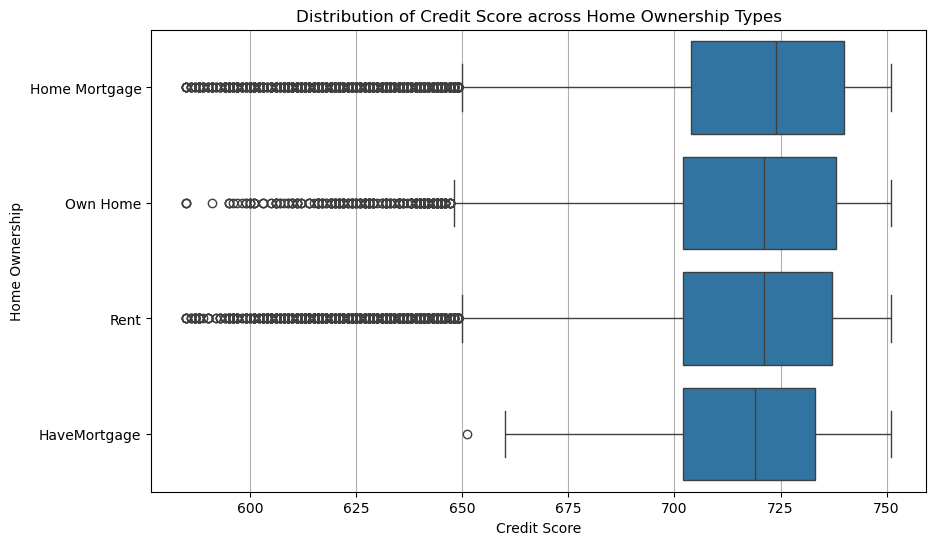

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df2,x='Credit Score',y='Home Ownership')
plt.xlabel('Credit Score')
plt.ylabel('Home Ownership')
plt.grid(axis='x')  # Grid lines for better readability
plt.title('Distribution of Credit Score across Home Ownership Types')
plt.show()

### Numeric Representation

In [74]:
df2.groupby('Home Ownership')['Credit Score'].describe()

count        mean        std    min    25%    50%    75%  \
Home Ownership                                                               
HaveMortgage      185.0  716.383784  22.028854  651.0  702.0  719.0  733.0   
Home Mortgage   39089.0  717.526568  28.540485  585.0  704.0  724.0  740.0   
Own Home         7480.0  715.346257  28.753753  585.0  702.0  721.0  738.0   
Rent            34092.0  715.086912  27.884310  585.0  702.0  721.0  737.0   

                  max  
Home Ownership         
HaveMortgage    751.0  
Home Mortgage   751.0  
Own Home        751.0  
Rent            751.0

## 5) How does the annual income differ for different purposes of loans?

In [76]:
df4 = pd.DataFrame(df.groupby(by='Purpose')['Annual Income'].mean().round(2))

### Numeric Representation

In [78]:
df4

Annual Income
Purpose                            
Business Loan            1591962.79
Buy House                1495251.47
Buy a Car                1220352.74
Debt Consolidation       1362463.57
Educational Expenses     1071051.32
Home Improvements        1667437.36
Medical Bills            1409286.17
Other                    1348516.49
Take a Trip              1219898.67
major_purchase           1430753.50
moving                   1591375.25
other                    1286008.49
renewable_energy         1473739.75
small_business           1547456.22
vacation                 1155289.53
wedding                  1464232.62

### Graphical Representation

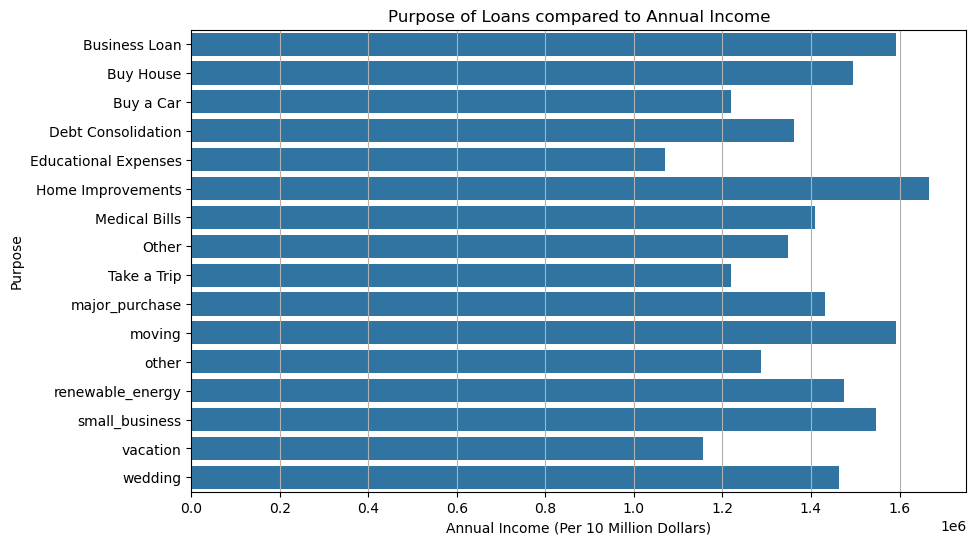

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(data=df4,x='Annual Income',y='Purpose')
plt.xlabel('Annual Income (Per 10 Million Dollars)')
plt.ylabel('Purpose')
plt.grid(axis='x')     # Grid Lines for better readability
plt.title('Purpose of Loans compared to Annual Income')
plt.show()

## 6) What is the average monthly debt for each term (short-term vs. long-term)?

In [82]:
df5 = df.dropna(subset='Term')

# Creating a New DataFrame and removing all the null values

In [83]:
df5['Monthly Debt'].isna().unique()

# To check null values

array([False])

In [84]:
df5['Term'].isna().unique()

# To check null values

array([False])

In [85]:
df5 = pd.DataFrame(df5.groupby(by='Term')['Monthly Debt'].mean().round(2))

### Numeric Representation

In [87]:
df5

Monthly Debt
Term                    
Long Term       21585.66
Short Term      17274.16

### Graphical Representation

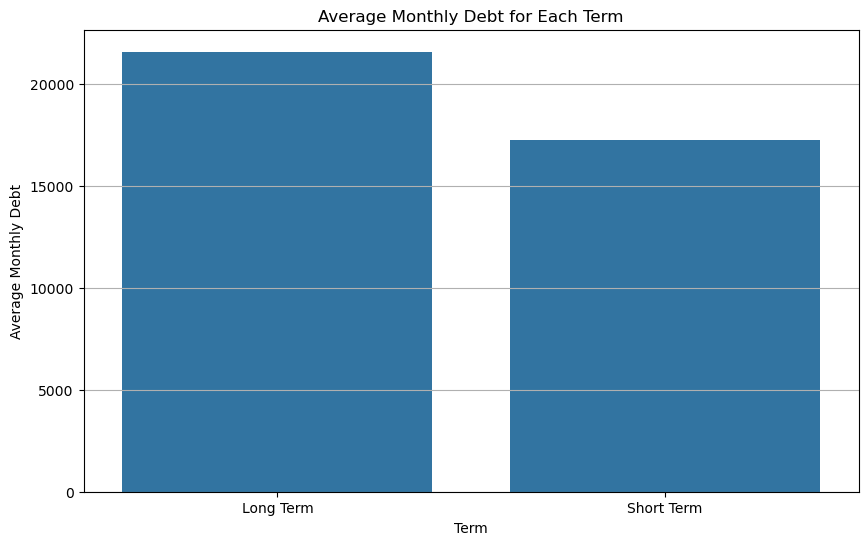

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(data=df5,x='Term',y='Monthly Debt')
plt.xlabel('Term')
plt.ylabel('Average Monthly Debt')
plt.grid(axis='y')    # Grid Lines for better readability  
plt.title('Average Monthly Debt for Each Term')
plt.show()

## 7) Is there a correlation between years of credit history and the current credit balance?

In [91]:
df6 = df.dropna(subset='Current Credit Balance')

# Creating a New DataFrame and removing all the null values

In [92]:
df6['Current Credit Balance'].isna().unique()     

# To check null values

array([False])

In [93]:
df6['Years of Credit History'].unique()

# To check null values

array([17.2, 21.1, 14.9, 12. ,  6.1, 17.3, 19.6,  8.2, 22.6, 13.9, 16. ,
       23.2,  8.5, 13.3, 24.7, 19.4, 20.5, 22. , 27.1, 22.7, 17.4, 11.9,
       15.7, 17.5, 14.4, 22.3, 14. , 20. , 43.7, 18. , 15.4, 14.6, 24.5,
       14.1, 20.6, 28.8, 16.6, 16.7, 14.8, 14.5, 21.6, 18.6, 17.8, 20.9,
       17. , 15.6, 36.6, 40.8, 11.4,  9.2, 16.1, 15. , 18.3, 12.1, 31.5,
       19.3, 21.8, 15.1, 25.6, 31.4, 29.5, 13.8, 21.5,  6.4, 10.5, 13. ,
       19. , 11.8, 28.2, 12.2, 44.5, 27.4, 20.4, 22.4, 29.1, 31.3, 17.9,
       14.2, 25.9, 14.7, 23.3, 19.7, 10. , 19.5, 11. , 12.3, 13.6, 26.5,
       10.2, 16.9,  7. , 12.5, 15.9, 10.7, 13.4, 20.7,  9. , 23.4,  9.5,
       34.4, 18.4, 23.5, 14.3, 50.1, 13.2, 33.1, 23.9, 13.5, 43.3, 24. ,
       23. , 16.2, 29.2, 18.2, 44. , 21. , 30.5,  7.1,  6.6, 15.8, 16.5,
       17.6, 13.7, 36.3, 22.5,  8.6, 15.5, 10.8, 18.7, 30.9, 17.1, 16.3,
        4.9, 21.4, 11.1, 11.7, 10.3, 18.5,  8.7,  9.9, 19.2, 21.3, 22.2,
       33.7, 27. , 18.8, 13.1, 15.2, 15.3, 21.2, 20

In [94]:
df6['Years of Credit History'].isna().unique()     

# To check null values

array([False])

In [95]:
df6['Current Credit Balance'].max()

# To check the range 

32878968.0

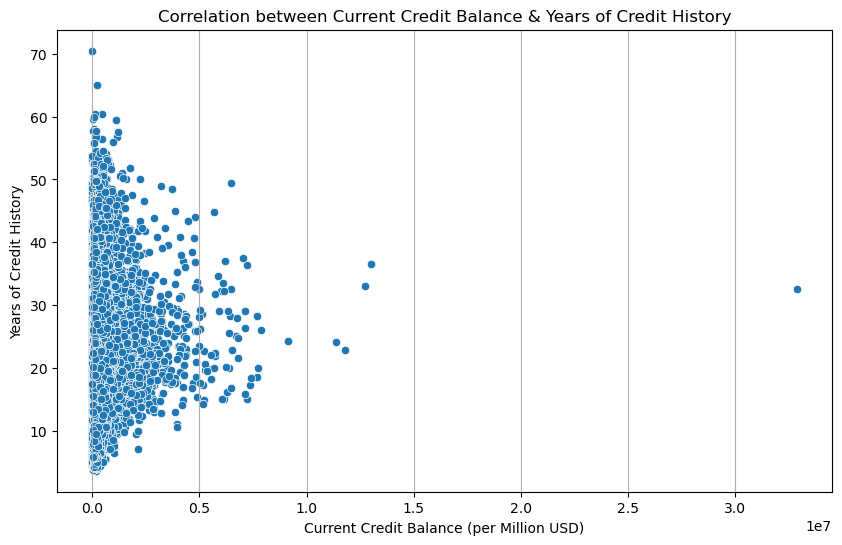

In [96]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df6,x='Current Credit Balance',y='Years of Credit History')
plt.grid(axis='x')   # Grid Lines for better readability
plt.xlabel('Current Credit Balance (per Million USD)')
plt.ylabel('Years of Credit History')
plt.title('Correlation between Current Credit Balance & Years of Credit History')
plt.show()

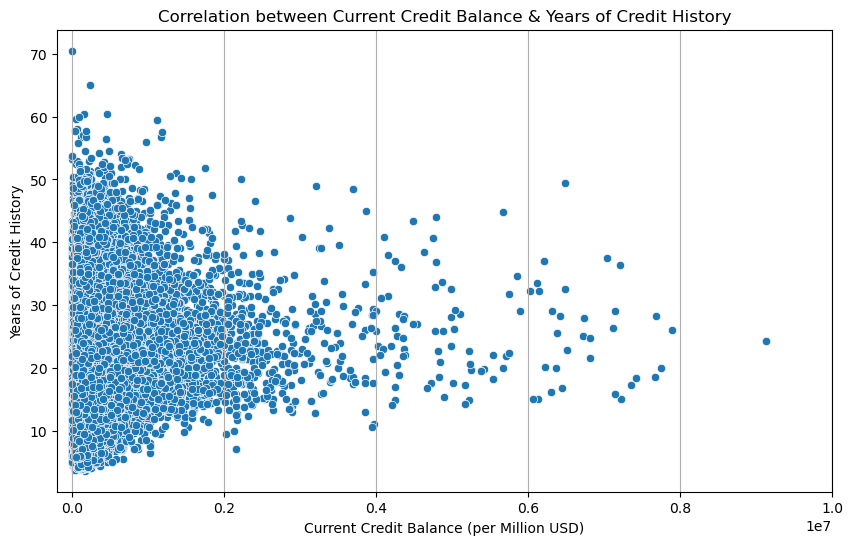

In [97]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df6,x='Current Credit Balance',y='Years of Credit History')
plt.grid(axis='x')          # Grid Lines for better readability
plt.xlim(-200000,10000000)     # To not include outliers
plt.xlabel('Current Credit Balance (per Million USD)')
plt.ylabel('Years of Credit History')
plt.title('Correlation between Current Credit Balance & Years of Credit History')
plt.show()

In [98]:
df6[['Years of Credit History','Current Credit Balance']].corr()

Years of Credit History  Current Credit Balance
Years of Credit History                  1.00000                 0.20847
Current Credit Balance                   0.20847                 1.00000

In [99]:
df6['Current Credit Balance'].max()

32878968.0

In [100]:
df6 = df6[df6['Current Credit Balance'] < 1000000]   

# To remove Outliers

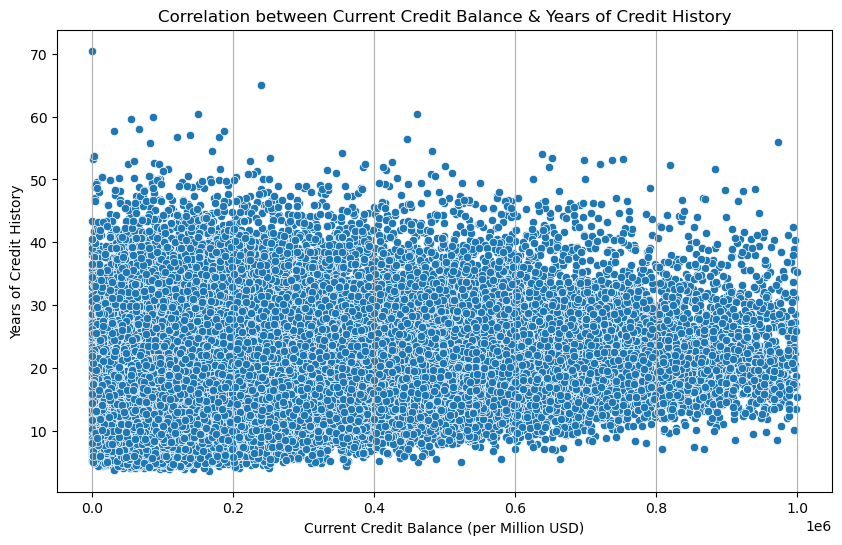

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df6,x='Current Credit Balance',y='Years of Credit History')
plt.grid(axis='x')    # Grid Lines for better readability
plt.xlabel('Current Credit Balance (per Million USD)')
plt.ylabel('Years of Credit History')
plt.title('Correlation between Current Credit Balance & Years of Credit History')
plt.show()

In [102]:
df6[['Years of Credit History','Current Credit Balance']].corr()

Years of Credit History  Current Credit Balance
Years of Credit History                 1.000000                0.237888
Current Credit Balance                  0.237888                1.000000


### As the Correlation between Number of Open Accounts and Current Credit Balance is 0.237888, the correlation between them is on a weaker side. 

### Hence, there is no correlation between them.

## 8) How does the credit score vary with the years in the current job?

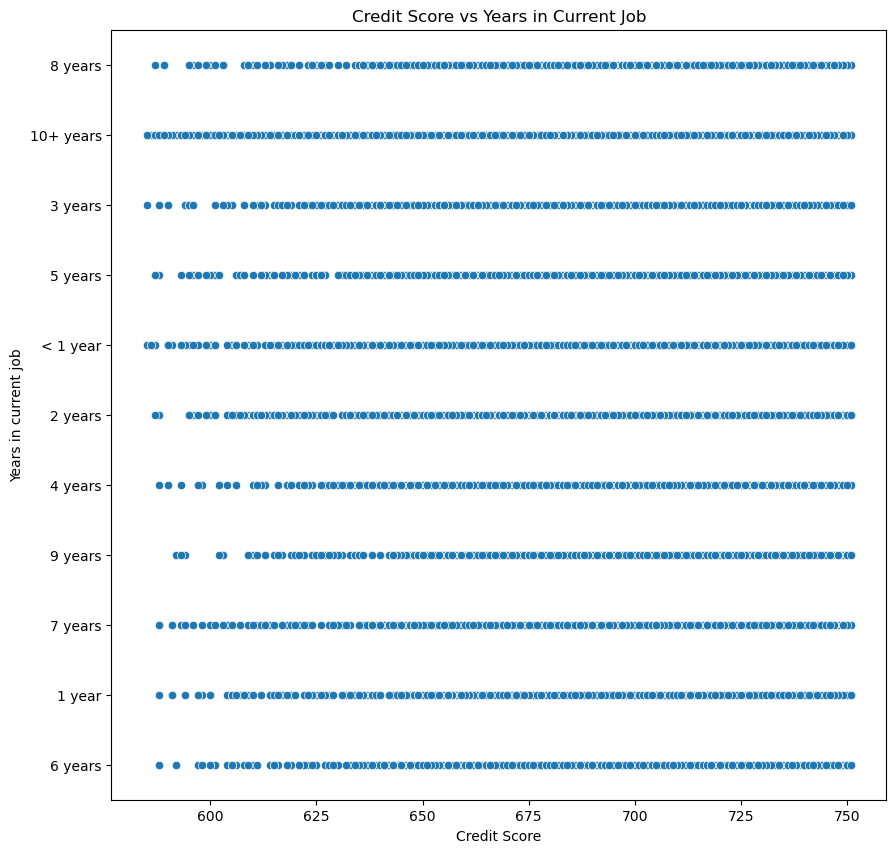

In [106]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df,x='Credit Score',y='Years in current job')
plt.title('Credit Score vs Years in Current Job')
plt.show()

In [107]:
df['Years in current job'].unique()          

# To check all Unique Values

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [108]:
df7 = df.dropna(subset='Years in current job')   

# Removing null Values

In [109]:
df7['Years in current job'].unique()            

# To recheck null Values

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', '6 years'],
      dtype=object)

In [110]:
# Function to convert the strings to integers

def convert_to_integers(year_str):
    if '<' in year_str:
        return 0              # Assuming "<1 year" means 0 years
    elif '+' in year_str:
        return int(year_str.split('+')[0])    # Take the numeric part before "+"
    else: 
        return int(year_str.split()[0])       # Split by space and take the first part

In [111]:
# Apply the conversion function to the "Years in current job" column

df7['Years in current job'] = df7['Years in current job'].apply(convert_to_integers)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24012\2970841671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Years in current job'] = df7['Years in current job'].apply(convert_to_integers)


In [112]:
# To Check whether the conversion was successful

df7['Years in current job'].unique()                  

array([ 8, 10,  3,  5,  0,  2,  4,  9,  7,  1,  6], dtype=int64)

In [113]:
# To check Null Values

df7['Credit Score'].unique()                 

array([709.,  nan, 741., 721., 729., 730., 678., 739., 728., 740., 743.,
       727., 723., 747., 687., 750., 714., 724., 704., 688., 749., 746.,
       737., 733., 725., 745., 720., 718., 682., 712., 680., 710., 598.,
       719., 661., 652., 736., 738., 644., 672., 699., 751., 694., 657.,
       748., 666., 734., 742., 705., 624., 685., 717., 722., 618., 676.,
       692., 732., 649., 695., 744., 686., 637., 697., 706., 715., 707.,
       726., 716., 702., 651., 708., 698., 689., 703., 693., 645., 691.,
       700., 731., 658., 735., 674., 654., 681., 696., 713., 668., 659.,
       647., 683., 675., 670., 623., 711., 639., 671., 614., 667., 615.,
       656., 653., 664., 613., 636., 594., 646., 669., 701., 612., 673.,
       690., 641., 665., 677., 684., 655., 630., 663., 638., 596., 660.,
       679., 609., 603., 643., 633., 586., 629., 648., 640., 625., 635.,
       662., 627., 611., 604., 642., 621., 632., 602., 616., 600., 650.,
       597., 622., 610., 619., 628., 599., 606., 60

In [114]:
# Removing Null Values

df7 = df7.dropna(subset='Credit Score')   

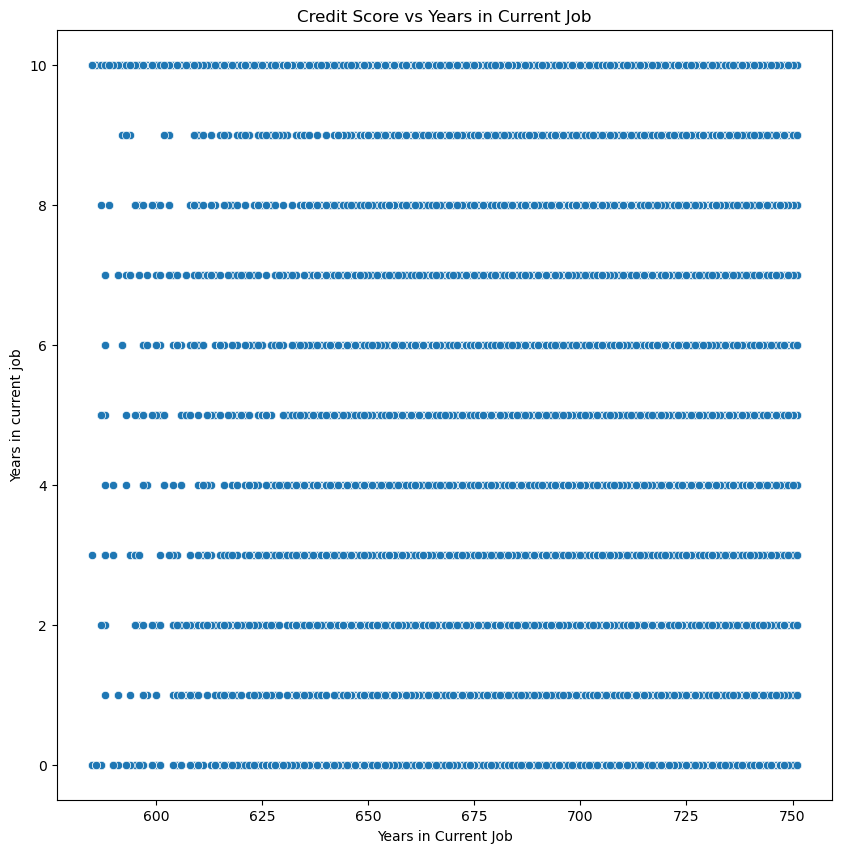

0 in Y-axis denotes less than 1 year and 10 denotes more than 10 years 


In [115]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df7,x='Credit Score',y='Years in current job')
plt.xlabel('Years in Current Job')
plt.title('Credit Score vs Years in Current Job')
plt.show()
print('0 in Y-axis denotes less than 1 year and 10 denotes more than 10 years ')

In [116]:
df7[['Credit Score','Years in current job']].corr()

Credit Score  Years in current job
Credit Score              1.000000             -0.017076
Years in current job     -0.017076              1.000000

In [117]:
pd.DataFrame(df7.groupby('Years in current job')['Credit Score'].var().round(2))

Credit Score
Years in current job              
0                           821.98
1                           763.28
2                           782.46
3                           767.91
4                           761.60
5                           803.63
6                           812.67
7                           837.17
8                           839.64
9                           791.95
10                          817.69

In [118]:
pd.DataFrame(df7.groupby('Years in current job')['Credit Score'].std().round(2))

Credit Score
Years in current job              
0                            28.67
1                            27.63
2                            27.97
3                            27.71
4                            27.60
5                            28.35
6                            28.51
7                            28.93
8                            28.98
9                            28.14
10                           28.60

## 9) What is the relationship between the number of credit problems and the number of open accounts?

In [120]:
df8 = df.dropna(subset='Number of Open Accounts')

# Creating a New DataFrame and removing all the null values

In [121]:
df8['Number of Open Accounts'].isna().unique()

# To check null values

array([False])

In [122]:
df8['Number of Credit Problems'].isna().unique()

# To check null values

array([False])

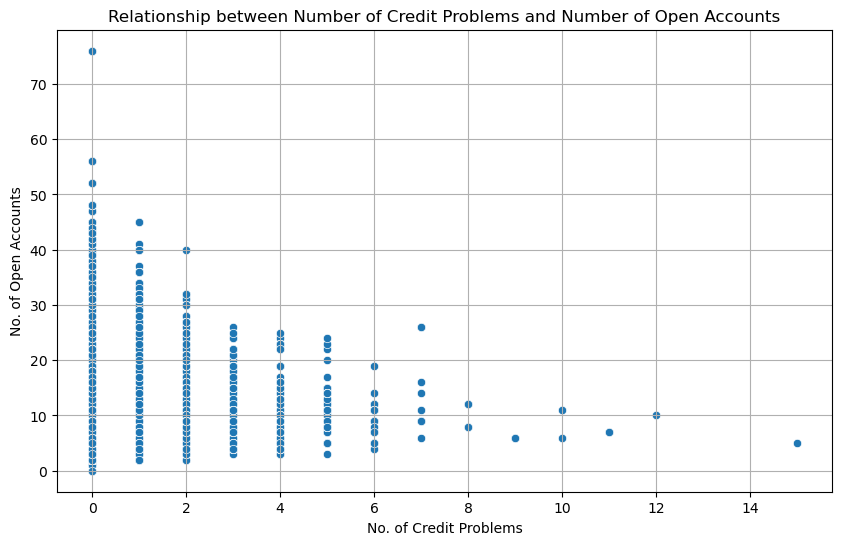

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df8,x='Number of Credit Problems',y='Number of Open Accounts')
plt.xlabel('No. of Credit Problems')
plt.ylabel('No. of Open Accounts')
plt.grid()         # Grid Lines for better readability
plt.title('Relationship between Number of Credit Problems and Number of Open Accounts')
plt.show()

In [124]:
df8[['Number of Credit Problems','Number of Open Accounts']].corr()

Number of Credit Problems  Number of Open Accounts
Number of Credit Problems                   1.000000                -0.013995
Number of Open Accounts                    -0.013995                 1.000000

### Since the correlation between Number of Credit Problems and Number of Open Accounts is -0.013995, we can say that both of them are not related to each other

## 10) What is the distribution of annual income across different loan statuses?

In [127]:
df9 = df.dropna(subset='Annual Income')

# Creating a New DataFrame and removing all the null values

In [128]:
df9['Annual Income'].isna().unique()     

# To check null values

array([False])

In [129]:
df9['Loan Status'].isna().unique()      

# To check null values

array([False])

### Graphical Representation

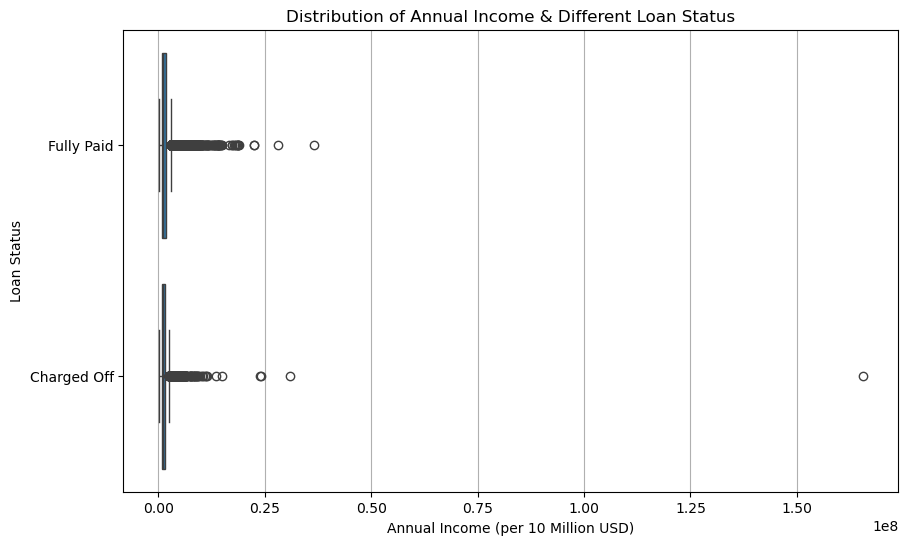

In [131]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df9,x='Annual Income', y='Loan Status')
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Loan Status')
plt.grid(axis='x')    # Grid Lines for better readability
plt.title('Distribution of Annual Income & Different Loan Status')
plt.show()

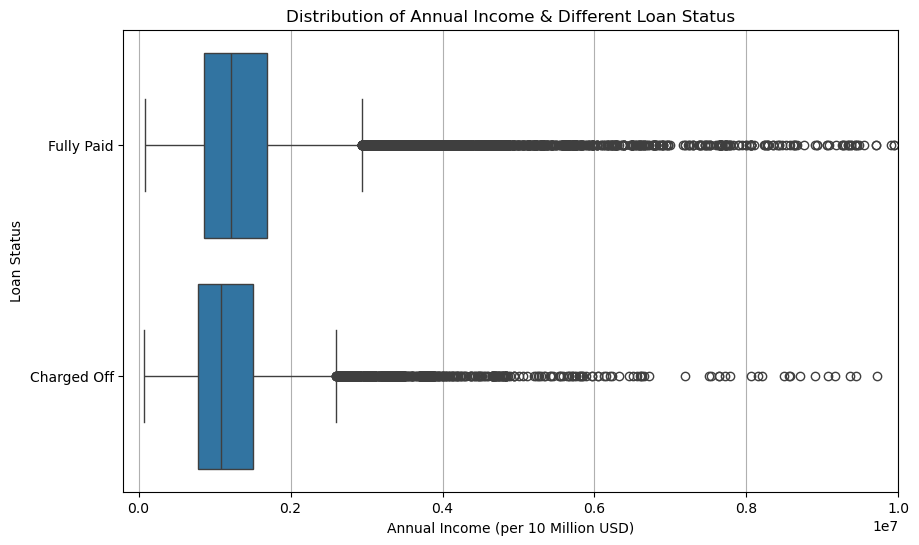

In [132]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df9,x='Annual Income', y='Loan Status')
plt.xlim(-200000,10000000)     # To not include outliers and for better readability
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Loan Status')
plt.grid(axis='x')    # Grid Lines for better readability
plt.title('Distribution of Annual Income & Different Loan Status')
plt.show()

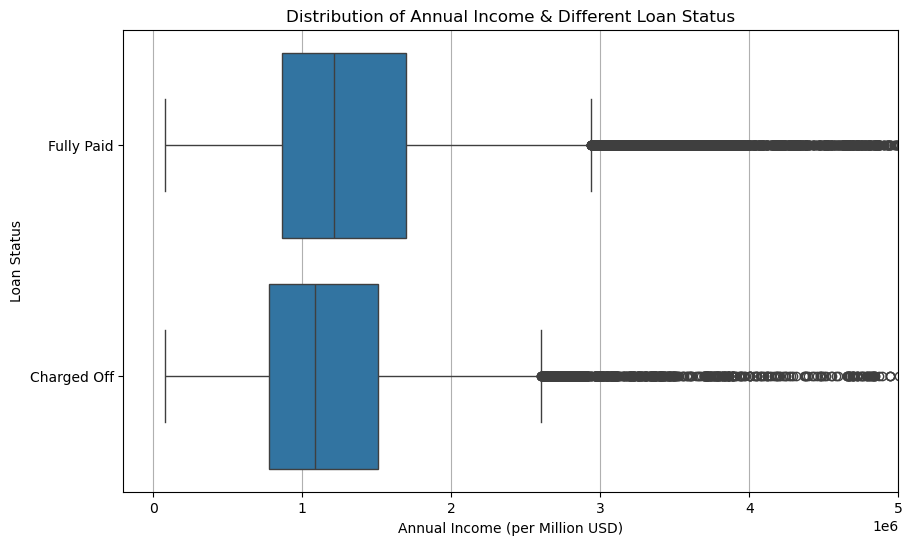

In [133]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df9,x='Annual Income', y='Loan Status')
plt.xlim(-200000,5000000)     # To not include outliers and for better readability
plt.xlabel('Annual Income (per Million USD)')
plt.ylabel('Loan Status')
plt.grid(axis='x')    # Grid Lines for better readability
plt.title('Distribution of Annual Income & Different Loan Status')
plt.show()

### Numeric Representation

In [135]:
df9.groupby('Loan Status')['Annual Income'].describe()

count          mean           std      min        25%  \
Loan Status                                                            
Charged Off  17210.0  1.267790e+06  1.506251e+06  76627.0  778743.50   
Fully Paid   63636.0  1.408157e+06  9.315770e+05  81092.0  865853.75   

                   50%         75%          max  
Loan Status                                      
Charged Off  1085812.0  1507578.75  165557393.0  
Fully Paid   1213026.5  1694952.00   36475440.0

## 11) Is there a correlation between the current loan amount and the number of open accounts?

In [137]:
df1['Current Loan Amount'].isna().unique()   

# Using already made up DataFrame and checking null values

array([False])

In [138]:
df1['Number of Open Accounts'].isna().unique()      

# Using already made up DataFrame and checking null values

array([False])

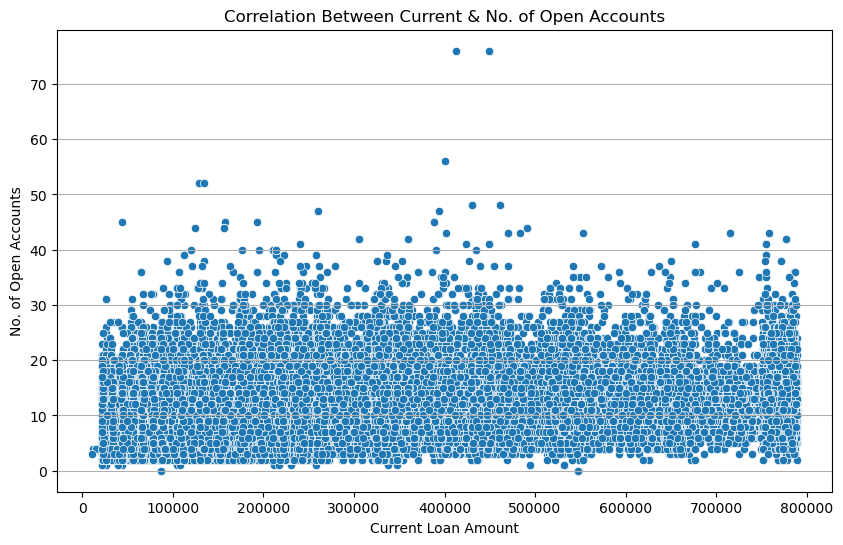

In [139]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1,x='Current Loan Amount', y = 'Number of Open Accounts')
plt.xlabel('Current Loan Amount')
plt.ylabel('No. of Open Accounts')
plt.grid(axis='y')         # Grid Lines for better understanding
plt.title('Correlation Between Current & No. of Open Accounts')
plt.show()

In [140]:
df1[['Number of Open Accounts','Current Loan Amount']].corr()

Number of Open Accounts  Current Loan Amount
Number of Open Accounts                 1.000000             0.203099
Current Loan Amount                     0.203099             1.000000

### As the Correlation between Number of Open Accounts and Current Loan Amount is 0.203099, the correlation between them is on a lower side

## 12) How does the monthly debt vary with the years of credit history?

In [143]:
df10 = df.dropna(subset='Monthly Debt')

In [144]:
df10['Monthly Debt'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [145]:
df10['Years of Credit History'].isna().unique()     

# Using already made up DataFrame and checking null values

array([False])

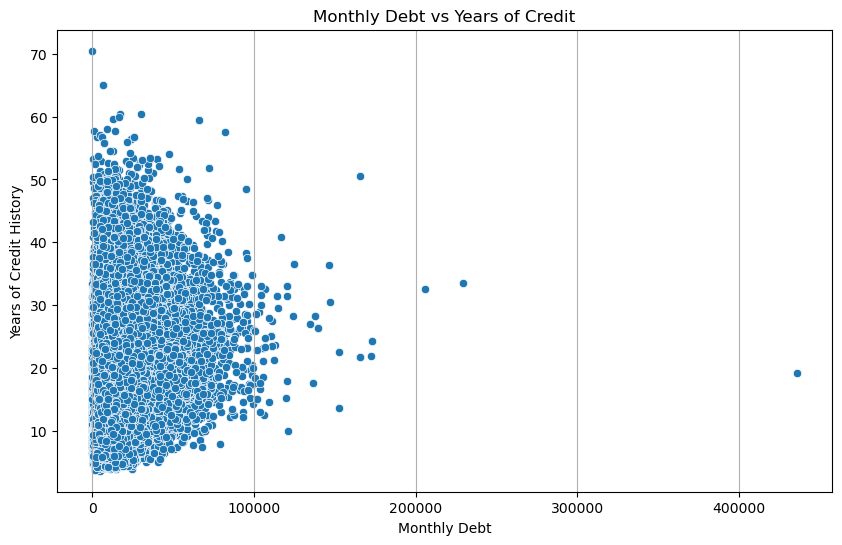

In [146]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df10,x='Monthly Debt', y='Years of Credit History')
plt.grid(axis='x')          # Grid Lines for better readability
plt.xlabel('Monthly Debt')
plt.ylabel('Years of Credit History')
plt.title('Monthly Debt vs Years of Credit')
plt.show()

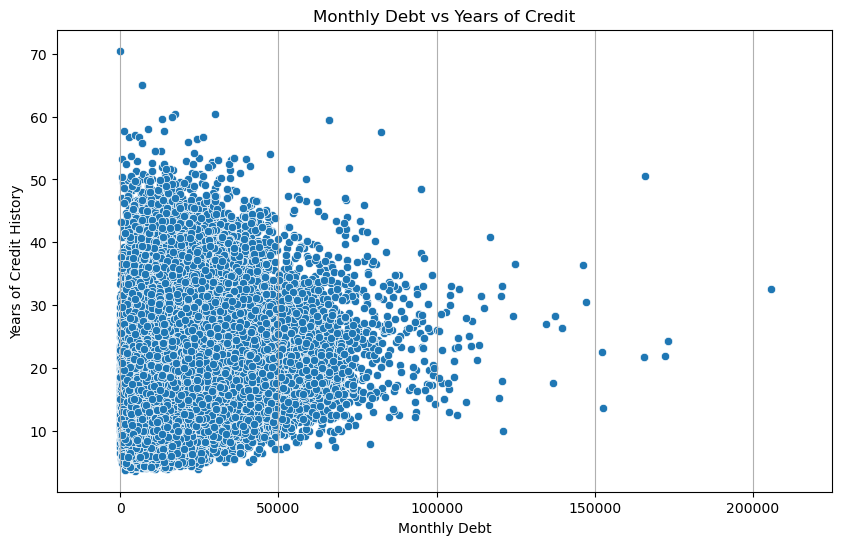

In [147]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df10,x='Monthly Debt', y='Years of Credit History')
plt.xlim(-20000,225000)     # To not include outliers
plt.grid(axis='x')         # Grid Lines for better readability
plt.xlabel('Monthly Debt')
plt.ylabel('Years of Credit History')
plt.title('Monthly Debt vs Years of Credit')
plt.show()

In [148]:
pd.DataFrame(df10[['Monthly Debt','Years of Credit History']].var().round(2))

0
Monthly Debt             1.482304e+08
Years of Credit History  4.921000e+01

In [149]:
pd.DataFrame(df10[['Monthly Debt','Years of Credit History']].std().round(2))

0
Monthly Debt             12174.99
Years of Credit History      7.02

## 13) What is the average annual income for each purpose of loan?

### Numeric Representation

In [152]:
df4

Annual Income
Purpose                            
Business Loan            1591962.79
Buy House                1495251.47
Buy a Car                1220352.74
Debt Consolidation       1362463.57
Educational Expenses     1071051.32
Home Improvements        1667437.36
Medical Bills            1409286.17
Other                    1348516.49
Take a Trip              1219898.67
major_purchase           1430753.50
moving                   1591375.25
other                    1286008.49
renewable_energy         1473739.75
small_business           1547456.22
vacation                 1155289.53
wedding                  1464232.62

### Graphical Representation

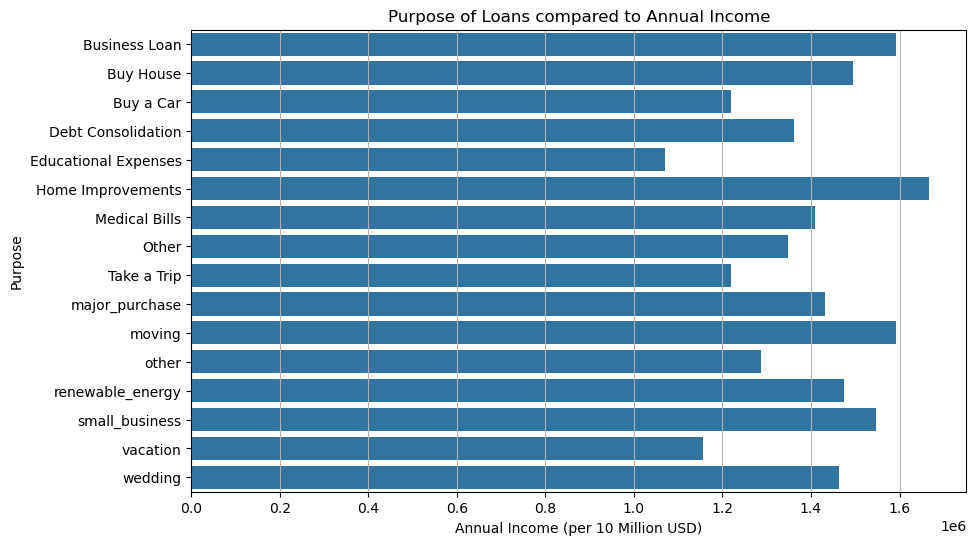

In [154]:
plt.figure(figsize=(10,6))
sns.barplot(data=df4,x='Annual Income',y='Purpose')
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Purpose')
plt.grid(axis='x')    # Grid Lines for better readability
plt.title('Purpose of Loans compared to Annual Income')
plt.show()

## 14) How does the credit score vary with the number of credit problems?

In [156]:
df2['Credit Score'].isna().unique()  

# Using already made up DataFrame and checking null values

array([False])

In [157]:
df2['Number of Credit Problems'].isna().unique()  

# Using already made up DataFrame and checking null values

array([False])

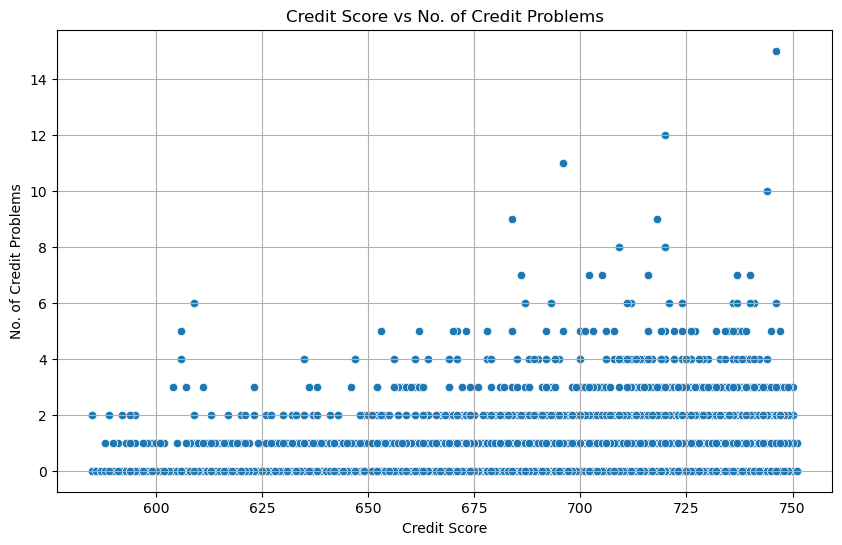

In [158]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Credit Score',y='Number of Credit Problems')
plt.xlabel('Credit Score')
plt.ylabel('No. of Credit Problems')
plt.grid()          # Grid Lines for better readability
plt.title('Credit Score vs No. of Credit Problems')
plt.show()

In [159]:
pd.DataFrame(df2[['Credit Score','Number of Credit Problems']].corr())

Credit Score  Number of Credit Problems
Credit Score                    1.00000                   -0.04726
Number of Credit Problems      -0.04726                    1.00000

In [160]:
pd.DataFrame(df2[['Credit Score','Number of Credit Problems']].var().round(2))

0
Credit Score               800.73
Number of Credit Problems    0.24

In [161]:
pd.DataFrame(df2[['Credit Score','Number of Credit Problems']].std().round(2))

0
Credit Score               28.30
Number of Credit Problems   0.49

## 15) Is there a correlation between the number of credit problems and the current credit balance?

In [163]:
df6['Current Credit Balance'].isna().unique()    

# Using already made up DataFrame and checking null values

array([False])

In [164]:
df6['Number of Credit Problems'].isna().unique()    

# Using already made up DataFrame and checking null values

array([False])

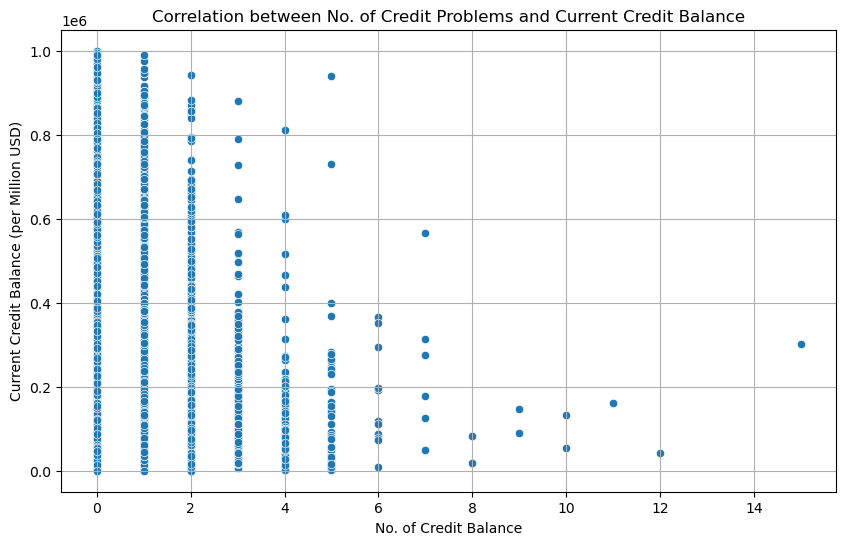

In [165]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df6,x='Number of Credit Problems', y='Current Credit Balance')
plt.xlabel('No. of Credit Balance')
plt.ylabel('Current Credit Balance (per Million USD)')
plt.grid()    # Grid Lines for better readability 
plt.title('Correlation between No. of Credit Problems and Current Credit Balance')
plt.show()

In [166]:
df6[['Number of Credit Problems','Current Credit Balance']].corr()

Number of Credit Problems  Current Credit Balance
Number of Credit Problems                   1.000000               -0.163361
Current Credit Balance                     -0.163361                1.000000

### As the Correlation between Number of Credit Problems and Current Credit Balance is -0.163361, the correlation between them is on a weaker side

## 16) What is the distribution of current loan amounts across different home ownership types?

In [169]:
df1['Current Loan Amount'].isna().unique()     

# Using already made up DataFrame and checking null values

array([False])

In [170]:
df1['Home Ownership'].isna().unique()     

# Using already made up DataFrame and checking null values

array([False])

### Graphical Representation

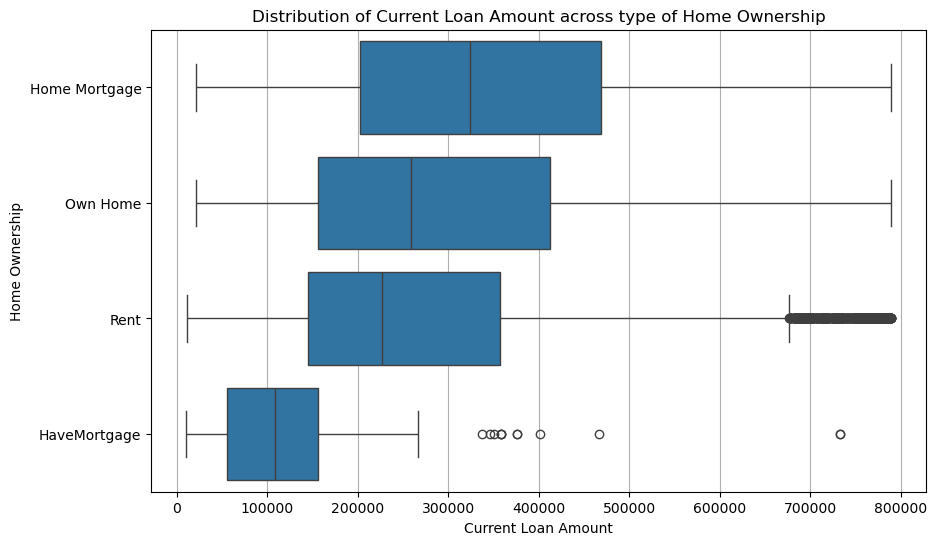

In [172]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1,x='Current Loan Amount',y='Home Ownership')
plt.xlabel('Current Loan Amount')
plt.ylabel('Home Ownership')
plt.grid(axis='x')      # Gridlines for better readability
plt.title('Distribution of Current Loan Amount across type of Home Ownership')
plt.show()

### Numeric Representation

In [174]:
df1.groupby('Home Ownership')['Current Loan Amount'].describe()

count           mean            std      min       25%  \
Home Ownership                                                             
HaveMortgage      185.0  127574.789189  106018.905122  10802.0   55858.0   
Home Mortgage   42690.0  350595.067323  193998.628060  21472.0  202268.0   
Own Home         8148.0  298699.116593  184059.002124  21472.0  155683.0   
Rent            37493.0  272596.091750  167881.641125  11242.0  145178.0   

                     50%       75%       max  
Home Ownership                                
HaveMortgage    108350.0  155826.0  733106.0  
Home Mortgage   324434.0  469249.0  789250.0  
Own Home        259336.0  412764.0  789030.0  
Rent            226952.0  357742.0  789250.0

## 17) How does the annual income vary with the years in the current job?

In [176]:
df11 = df.dropna(subset='Annual Income')

# Creating a New DataFrame and removing all the null values

In [177]:
df11['Annual Income'].isna().unique()

# To check null values

array([False])

In [178]:
df11['Years in current job'].isna().unique()

# To check null values

array([False,  True])

In [179]:
df11 = df11.dropna(subset='Years in current job')   

# Removing null Values

In [180]:
df11['Years in current job'].unique()       

# To recheck null Values

array(['8 years', '3 years', '10+ years', '< 1 year', '2 years',
       '4 years', '1 year', '6 years', '5 years', '7 years', '9 years'],
      dtype=object)

In [181]:
# Apply the conversion function to the "Years in current job" column

df11['Years in current job'] = df11['Years in current job'].apply(convert_to_integers)

In [182]:
df11['Years in current job'].unique()  

# To recheck null Values

array([ 8,  3, 10,  0,  2,  4,  1,  6,  5,  7,  9], dtype=int64)

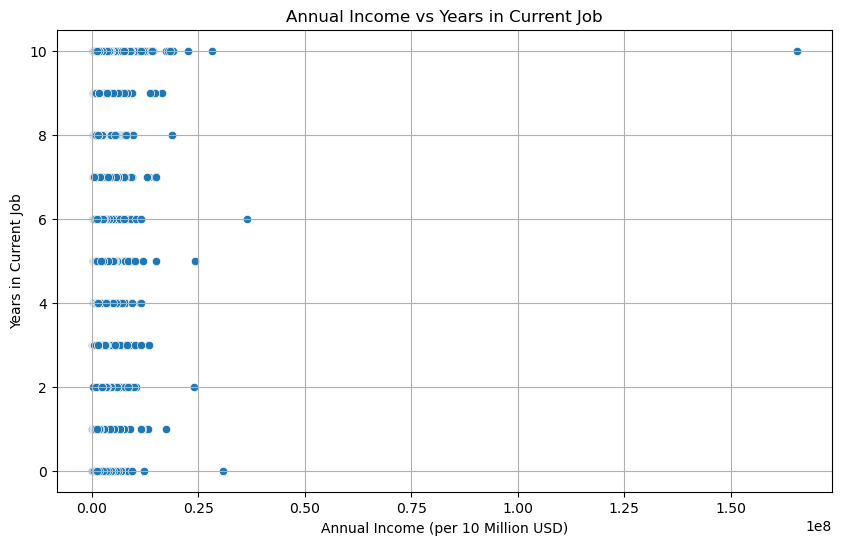

In [183]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df11,x='Annual Income', y='Years in current job')
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Years in Current Job')
plt.grid()       # Grid Lines for better readability   
plt.title('Annual Income vs Years in Current Job')
plt.show()

In [184]:
df11[['Years in current job','Annual Income']].corr()

Years in current job  Annual Income
Years in current job              1.000000       0.078364
Annual Income                     0.078364       1.000000

In [185]:
df11 = df11[df11['Annual Income'] < 50000000]    

# To remove Outliers

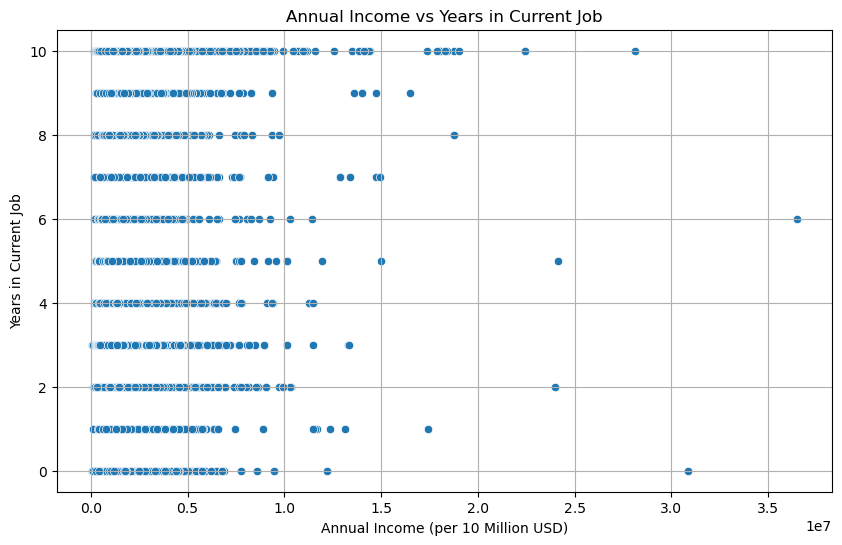

In [186]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df11,x='Annual Income', y='Years in current job')
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Years in Current Job')
plt.grid()          # Grid Lines for better readability
plt.title('Annual Income vs Years in Current Job')
plt.show()

In [187]:
df11[['Years in current job','Annual Income']].corr()

Years in current job  Annual Income
Years in current job              1.000000       0.090432
Annual Income                     0.090432       1.000000

In [188]:
df11 = df11[df11['Annual Income'] < 20000000]    

# To remove Outliers

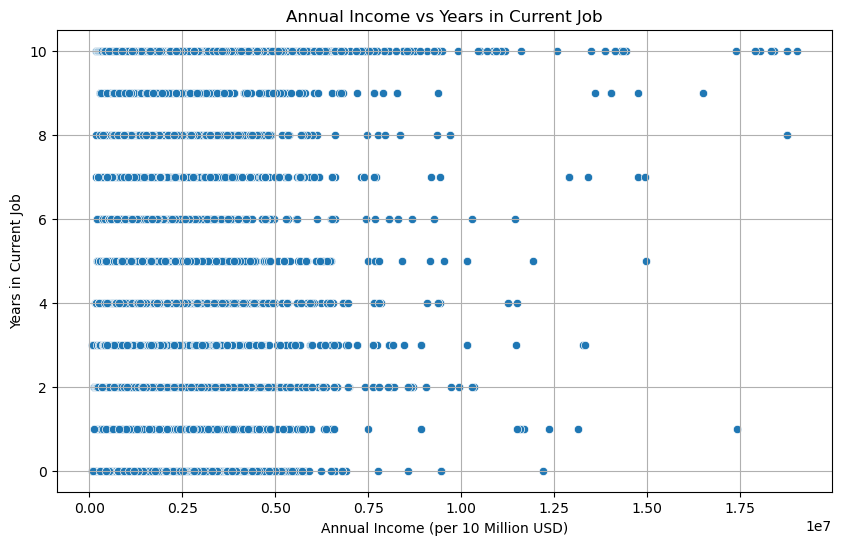

In [189]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df11,x='Annual Income', y='Years in current job')
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Years in Current Job')
plt.grid()       # Grid Lines for better readability
plt.title('Annual Income vs Years in Current Job')
plt.show()

In [190]:
df11[['Years in current job','Annual Income']].corr()

Years in current job  Annual Income
Years in current job              1.000000       0.093857
Annual Income                     0.093857       1.000000

## As the Correlation between Number of Credit Problems and Current Credit Balance is 0.093857, the correlation between them is negligible

## 18) Is there a correlation between the current loan amount and the monthly debt?

In [193]:
df1['Current Loan Amount'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [194]:
df1['Monthly Debt'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

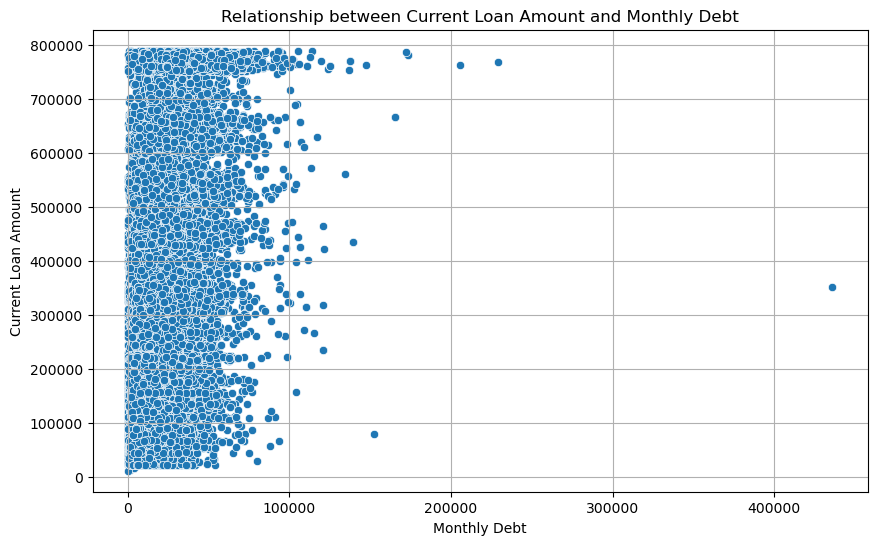

In [195]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1,x='Monthly Debt',y='Current Loan Amount')
plt.xlabel('Monthly Debt')
plt.ylabel('Current Loan Amount')
plt.grid()    # Grid Lines for better readability
plt.title('Relationship between Current Loan Amount and Monthly Debt')
plt.show()

In [196]:
df1[['Current Loan Amount','Monthly Debt']].corr()

Current Loan Amount  Monthly Debt
Current Loan Amount             1.000000      0.438728
Monthly Debt                    0.438728      1.000000

In [197]:
df12 = df1[df1['Monthly Debt'] < 200000]   

# To remove Outliers

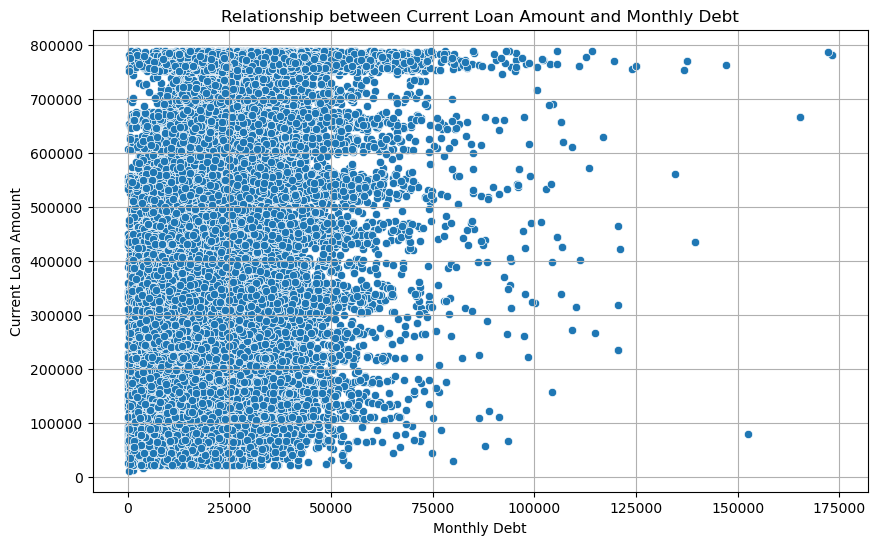

In [198]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df12,x='Monthly Debt',y='Current Loan Amount')
plt.xlabel('Monthly Debt')
plt.ylabel('Current Loan Amount')
plt.grid()   # Grid Lines for better readability
plt.title('Relationship between Current Loan Amount and Monthly Debt')
plt.show()

In [199]:
df12[['Current Loan Amount','Monthly Debt']].corr()

Current Loan Amount  Monthly Debt
Current Loan Amount             1.000000      0.442072
Monthly Debt                    0.442072      1.000000

In [200]:
df12 = df12[df12['Monthly Debt'] < 90000]

# To remove Outliers again

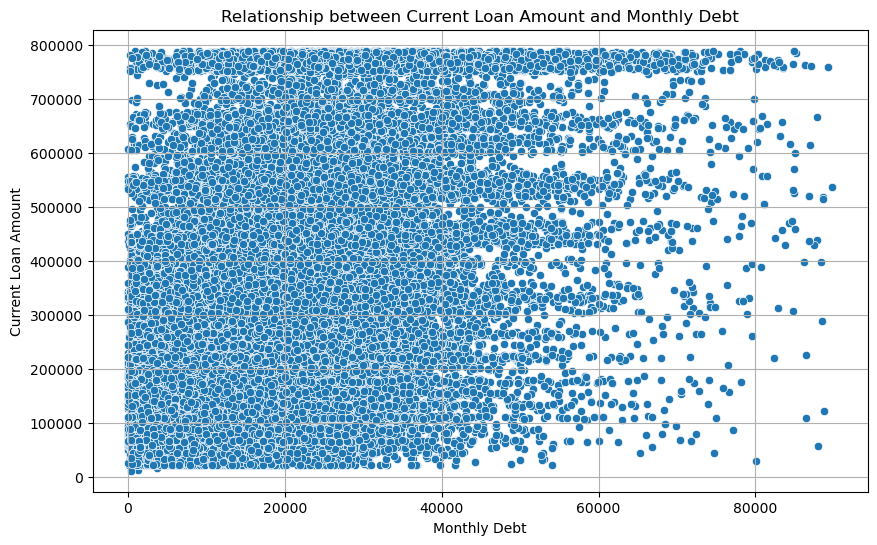

In [201]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df12,x='Monthly Debt',y='Current Loan Amount')
plt.xlabel('Monthly Debt')
plt.ylabel('Current Loan Amount')
plt.grid()   # Grid Lines for better readability
plt.title('Relationship between Current Loan Amount and Monthly Debt')
plt.show()

In [202]:
df12[['Current Loan Amount','Monthly Debt']].corr()

Current Loan Amount  Monthly Debt
Current Loan Amount             1.000000      0.446079
Monthly Debt                    0.446079      1.000000

### As the Correlation between Monthly Debt and Current Loan Amount is 0.446079, both of them are moderately correlated.

## 19) What is the average monthly debt for each home ownership type?

In [205]:
df10['Monthly Debt'].isna().unique()    

# Using already made up DataFrame and checking null values

array([False])

In [206]:
df10['Home Ownership'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [207]:
df13 = pd.DataFrame(df10.groupby(by='Home Ownership')['Monthly Debt'].mean().round(2)) 

### Numeric Representation

In [209]:
df13

Monthly Debt
Home Ownership              
HaveMortgage        18541.78
Home Mortgage       21072.06
Own Home            17060.08
Rent                15796.78

### Graphical Representation

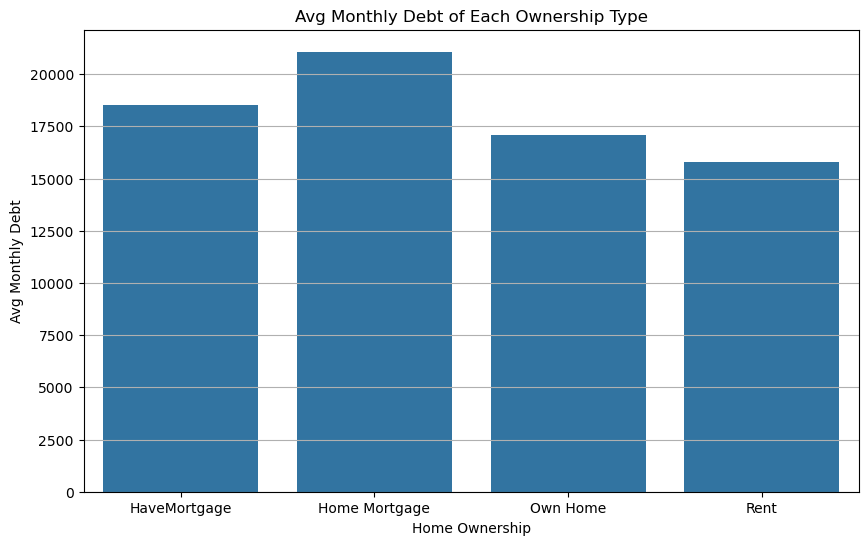

In [211]:
plt.figure(figsize=(10,6))
sns.barplot(data=df13,x='Home Ownership',y='Monthly Debt')
plt.xlabel('Home Ownership')
plt.ylabel('Avg Monthly Debt')
plt.grid(axis='y')   # Grid Lines for better readability
plt.title('Avg Monthly Debt of Each Ownership Type')
plt.show()

## 20) How does the credit score vary with the number of open accounts?

In [213]:
df2['Credit Score'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [214]:
df2['Number of Credit Problems'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

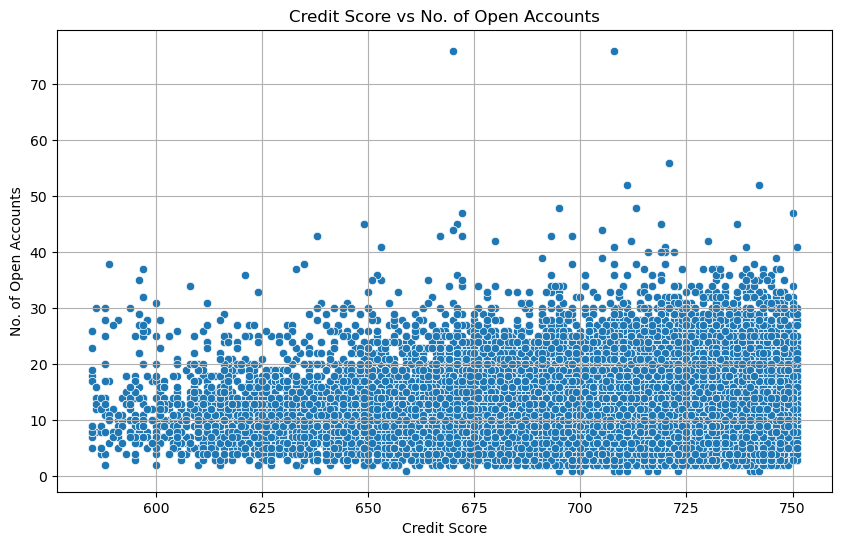

In [215]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Credit Score',y='Number of Open Accounts')
plt.xlabel('Credit Score')
plt.ylabel('No. of Open Accounts')
plt.grid()   # Grid Lines for better readability
plt.title('Credit Score vs No. of Open Accounts')
plt.show()

In [216]:
df2[['Credit Score','Number of Open Accounts']].corr()

Credit Score  Number of Open Accounts
Credit Score                 1.000000                -0.030063
Number of Open Accounts     -0.030063                 1.000000

In [217]:
pd.DataFrame(df2[['Credit Score','Number of Open Accounts']].var().round(2))

0
Credit Score             800.73
Number of Open Accounts   25.29

In [218]:
pd.DataFrame(df2[['Credit Score','Number of Open Accounts']].std().round(2))

0
Credit Score             28.30
Number of Open Accounts   5.03

## 21) What is the distribution of credit scores across different loan statuses?

In [220]:
df2['Credit Score'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [221]:
df2['Loan Status'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

### Graphical Representation

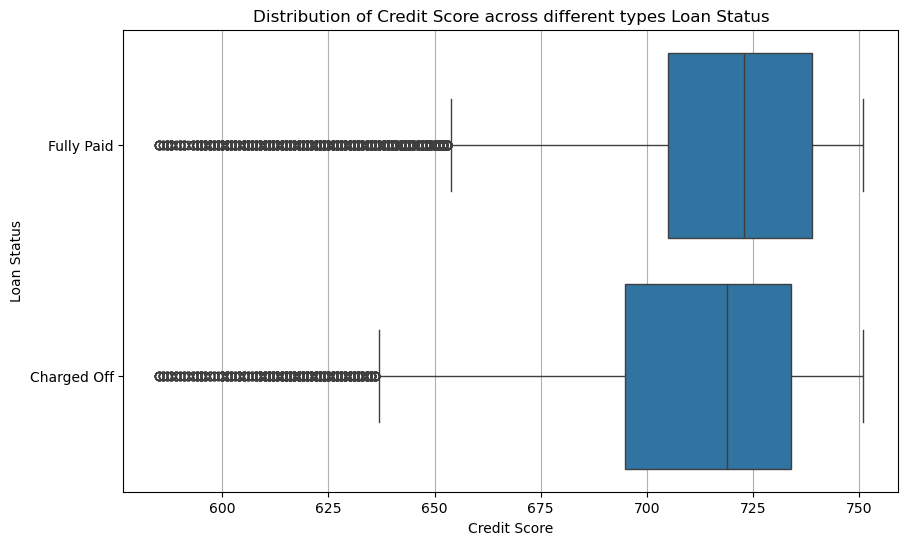

In [223]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df2,x='Credit Score',y='Loan Status')
plt.xlabel('Credit Score')
plt.ylabel('Loan Status')
plt.grid(axis='x')     # Grid Lines for better readability
plt.title('Distribution of Credit Score across different types Loan Status')
plt.show()

### Numeric Representation

In [225]:
df2.groupby('Loan Status')['Credit Score'].describe()

count        mean       std    min    25%    50%    75%    max
Loan Status                                                                  
Charged Off  17210.0  710.390471  31.26153  585.0  695.0  719.0  734.0  751.0
Fully Paid   63636.0  717.889874  27.22175  585.0  705.0  723.0  739.0  751.0

## 22) Is there a correlation between the current loan amount and the years of credit history?

In [227]:
df1['Current Loan Amount'].isna().unique()

array([False])

In [228]:
df1['Years of Credit History'].isna().unique()

array([False])

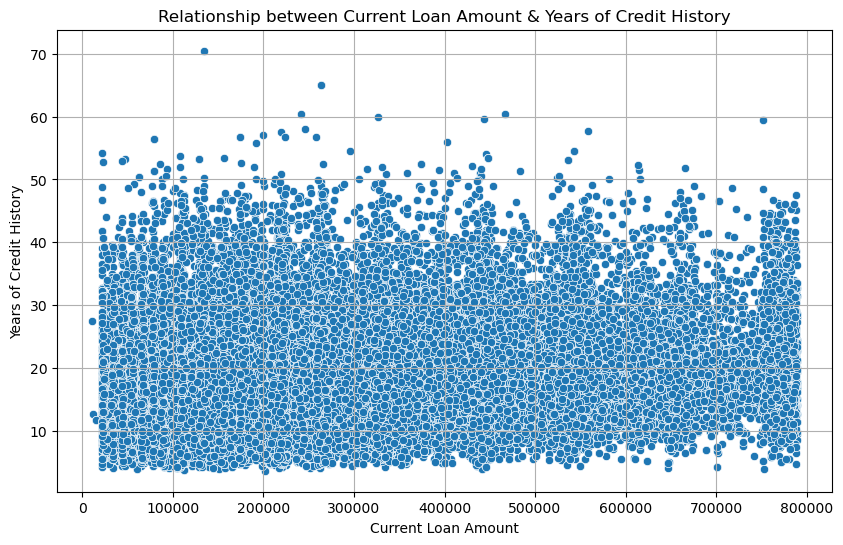

In [229]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1,x='Current Loan Amount',y='Years of Credit History')
plt.xlabel('Current Loan Amount')
plt.ylabel('Years of Credit History')
plt.grid()  # Grid Lines for better readability
plt.title('Relationship between Current Loan Amount & Years of Credit History')
plt.show()

In [230]:
df1[['Current Loan Amount','Years of Credit History']].corr()

Current Loan Amount  Years of Credit History
Current Loan Amount                 1.000000                 0.157962
Years of Credit History             0.157962                 1.000000

### As the Correlation between Years of Credit History and Current Loan Amount is 0.157962, the correlation between them is very low

## 23) How does the monthly debt vary with the number of credit problems?

In [233]:
df10['Monthly Debt'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [234]:
df10['Number of Credit Problems'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

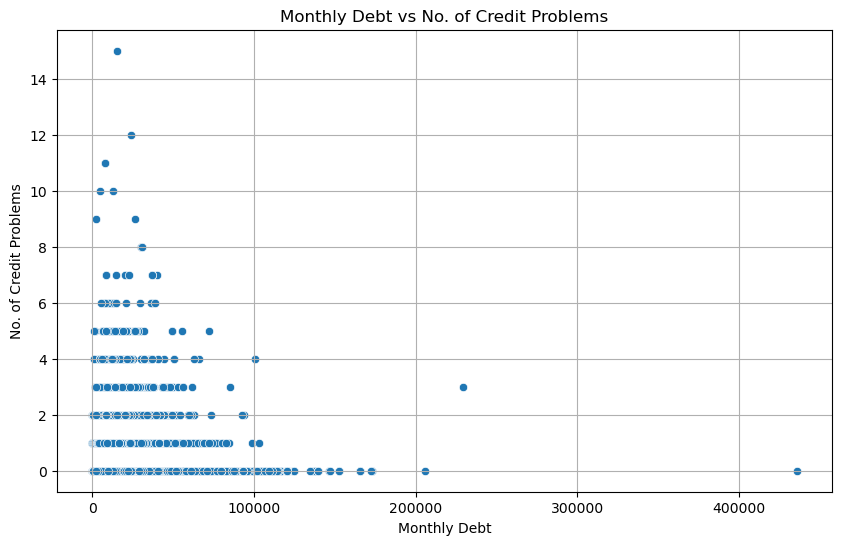

In [235]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df10,x='Monthly Debt',y='Number of Credit Problems')
plt.xlabel('Monthly Debt')
plt.ylabel('No. of Credit Problems')
plt.grid()   # Grid Lines for better readability
plt.title('Monthly Debt vs No. of Credit Problems')
plt.show()

In [236]:
df10[['Monthly Debt','Number of Credit Problems']].corr()

Monthly Debt  Number of Credit Problems
Monthly Debt                   1.000000                  -0.055383
Number of Credit Problems     -0.055383                   1.000000

In [237]:
pd.DataFrame(df10[['Monthly Debt','Number of Credit Problems']].var().round(2))

0
Monthly Debt               1.482304e+08
Number of Credit Problems  2.300000e-01

In [238]:
pd.DataFrame(df10[['Monthly Debt','Number of Credit Problems']].std().round(2))

0
Monthly Debt               12174.99
Number of Credit Problems      0.48

## 24) What is the average current loan amount for each purpose of loan?

In [240]:
df['Purpose'].isna().unique()

# To check null values

array([False,  True])

In [241]:
df14 = df.dropna(subset='Purpose')

# Creating a New DataFrame and removing all the null values

In [242]:
df14['Purpose'].isna().unique()

# To check null values

array([False])

In [243]:
df14['Current Loan Amount'].isna().unique()

# To check null values

array([False])

In [244]:
df14 = df14.groupby(by='Purpose')['Current Loan Amount'].mean().round(2).reset_index()

### Numeric Representation

In [246]:
df14

Purpose  Current Loan Amount
0          Business Loan            317074.92
1              Buy House            293399.63
2              Buy a Car            154720.50
3     Debt Consolidation            290887.46
4   Educational Expenses            143941.33
5      Home Improvements            275927.38
6          Medical Bills            175237.69
7                  Other            197810.18
8            Take a Trip            121905.53
9         major_purchase            205468.31
10                moving            167388.76
11                 other            189910.00
12      renewable_energy            197553.40
13        small_business            296953.20
14              vacation            127987.07
15               wedding            211687.25

### Graphical Representation

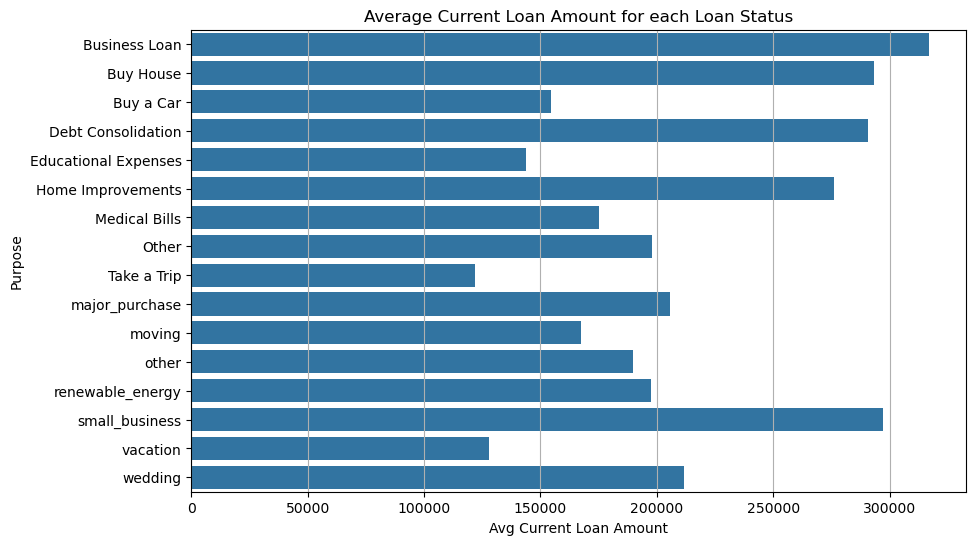

In [248]:
plt.figure(figsize=(10,6))
sns.barplot(data=df14,x='Current Loan Amount',y='Purpose')
plt.xlabel('Avg Current Loan Amount')
plt.ylabel('Purpose')
plt.grid(axis='x')  # Grid lines for better readability
plt.title('Average Current Loan Amount for each Loan Status')
plt.show()

## 25) How does the credit score vary with the current credit balance?

In [250]:
df2['Credit Score'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [251]:
df2['Current Credit Balance'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [252]:
df2['Current Credit Balance'].max()

# To check the range

32878968.0

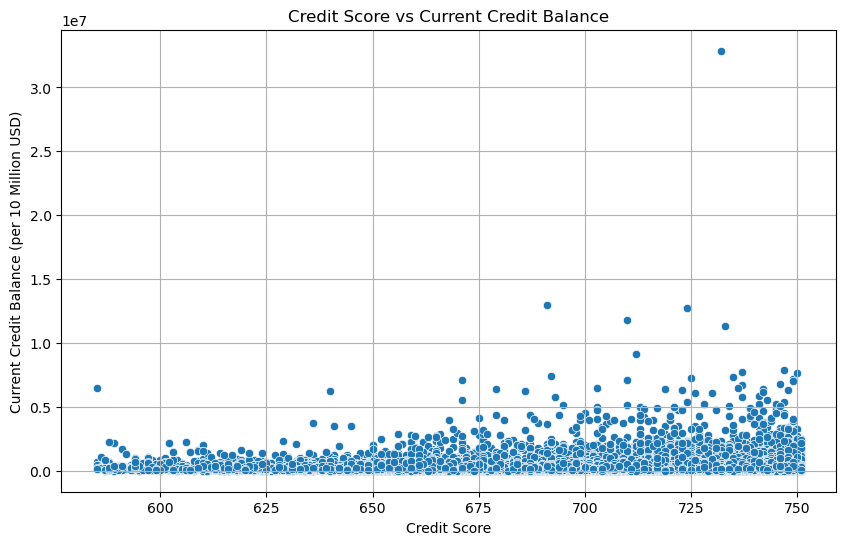

In [253]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Credit Score',y='Current Credit Balance')
plt.xlabel('Credit Score')
plt.ylabel('Current Credit Balance (per 10 Million USD)')
plt.grid()   # Grid Lines for better readability
plt.title('Credit Score vs Current Credit Balance')
plt.show()

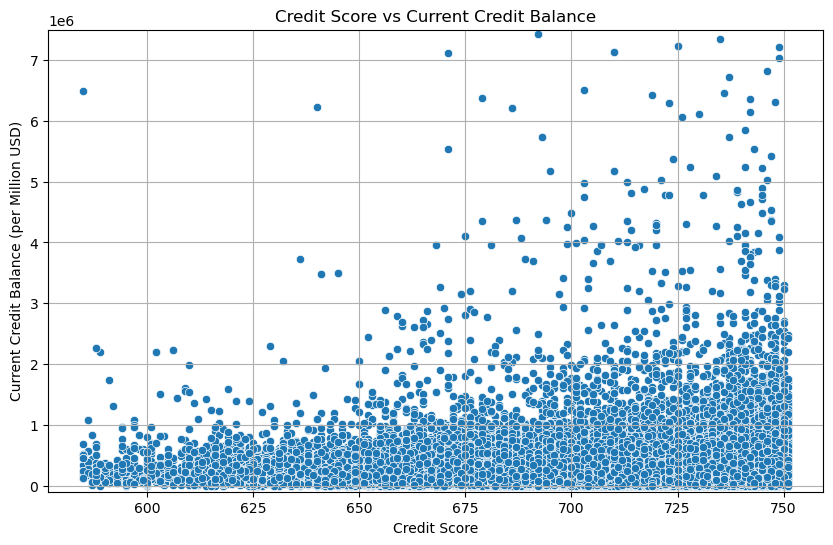

In [254]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Credit Score',y='Current Credit Balance')
plt.xlabel('Credit Score')
plt.ylabel('Current Credit Balance (per Million USD)')
plt.ylim(-100000,7500000)  # To not include outliers
plt.grid()    # Grid Lines for better readability
plt.title('Credit Score vs Current Credit Balance')
plt.show()

In [255]:
df2[['Credit Score','Current Credit Balance']].corr()

Credit Score  Current Credit Balance
Credit Score                1.000000               -0.015964
Current Credit Balance     -0.015964                1.000000

In [256]:
pd.DataFrame(df2[['Credit Score','Current Credit Balance']].var().round(2))

0
Credit Score            8.007300e+02
Current Credit Balance  1.456756e+11

In [257]:
pd.DataFrame(df2[['Credit Score','Current Credit Balance']].std().round(2))

0
Credit Score                28.30
Current Credit Balance  381674.71

## 26) Is there a correlation between the annual income and the current credit balance?

In [259]:
df6['Current Credit Balance'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [260]:
df6['Annual Income'].isna().unique()

# Using already made up DataFrame and checking null values

array([False,  True])

In [261]:
df6= df6.dropna(subset='Annual Income')

# To remove outliers

In [262]:
df6['Annual Income'].isna().unique()

# To recheck outliers

array([False])

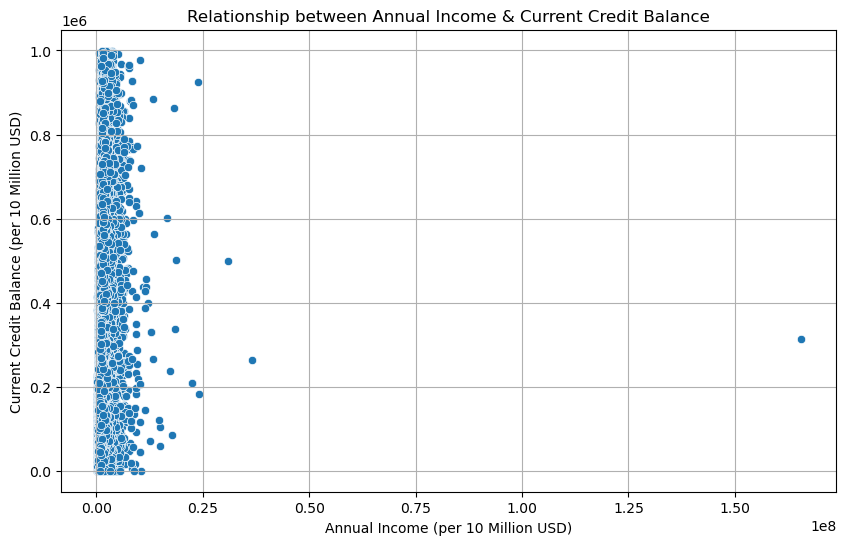

In [263]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df6,x='Annual Income',y='Current Credit Balance')
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Current Credit Balance (per 10 Million USD)')
plt.grid()   # Grid Lines for better readability
plt.title('Relationship between Annual Income & Current Credit Balance')
plt.show()

In [264]:
df6[['Annual Income','Current Credit Balance']].corr()

Annual Income  Current Credit Balance
Annual Income                1.000000                0.256798
Current Credit Balance       0.256798                1.000000

In [265]:
df6['Current Credit Balance'].max()    

# To check range

999400.0

In [266]:
df15 = df6[df6['Annual Income'] < 20000000]   

# To remove Outliers

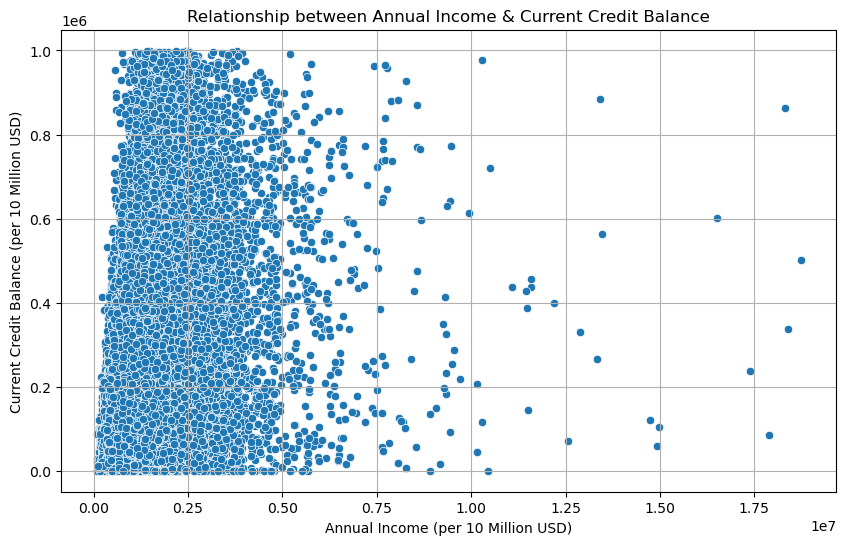

In [267]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df15,x='Annual Income',y='Current Credit Balance')
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Current Credit Balance (per 10 Million USD)')
plt.grid()    # Grid Lines for better readability
plt.title('Relationship between Annual Income & Current Credit Balance')
plt.show()

In [268]:
df15[['Annual Income','Current Credit Balance']].corr()

Annual Income  Current Credit Balance
Annual Income                1.000000                0.324571
Current Credit Balance       0.324571                1.000000

### As the Correlation between Annual Income and Current Credit Balance is 0.324571, the correlation between them is on a weaker side.

## 27) What is the distribution of annual income across different terms (short-term vs. long-term)?

In [271]:
df9['Annual Income'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [272]:
df9['Term'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

### Graphical Representation

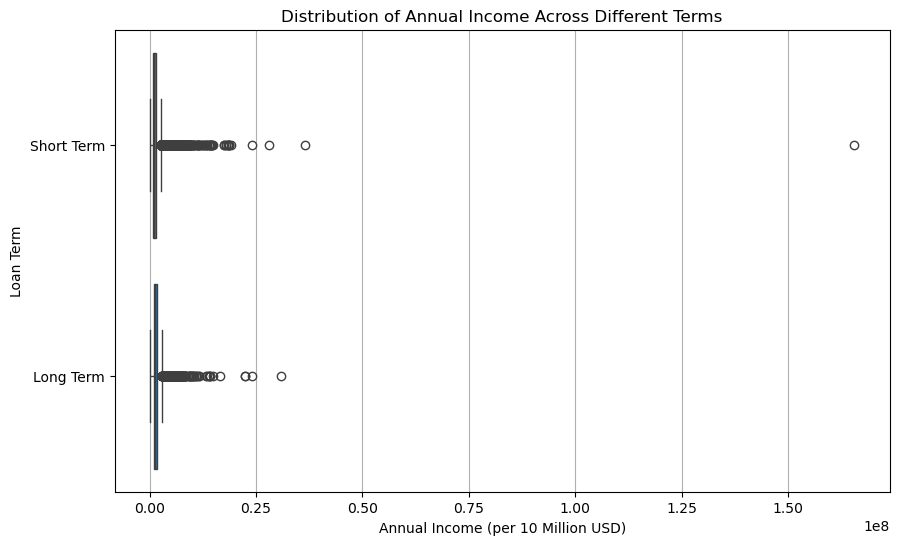

In [274]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df9,x='Annual Income',y='Term')
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Loan Term')
plt.grid(axis='x')    # Grid Lines for better readability
plt.title('Distribution of Annual Income Across Different Terms')
plt.show()

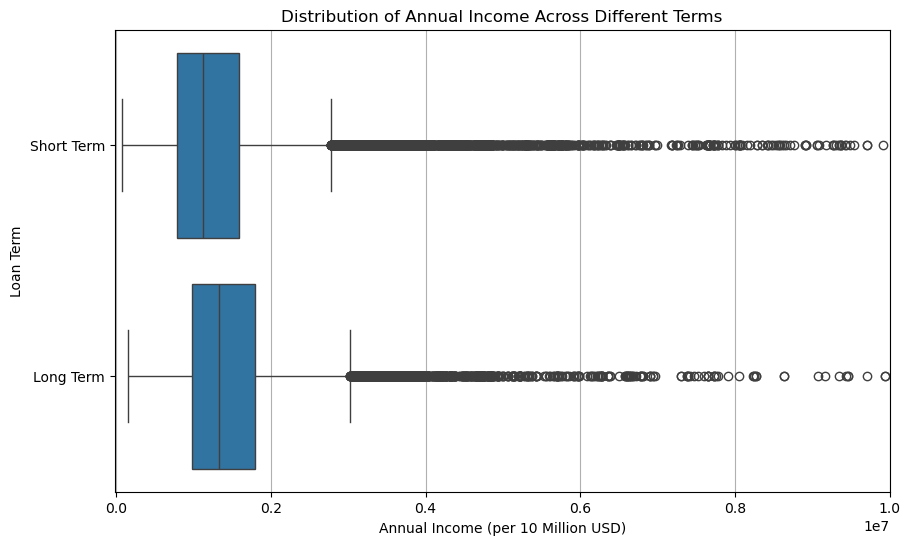

In [275]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df9,x='Annual Income',y='Term')
plt.xlabel('Annual Income (per 10 Million USD)')
plt.ylabel('Loan Term')
plt.xlim(-20000,10000000)    # To not include outliers     
plt.grid(axis='x')        # Grid Lines for better readability
plt.title('Distribution of Annual Income Across Different Terms')
plt.show()

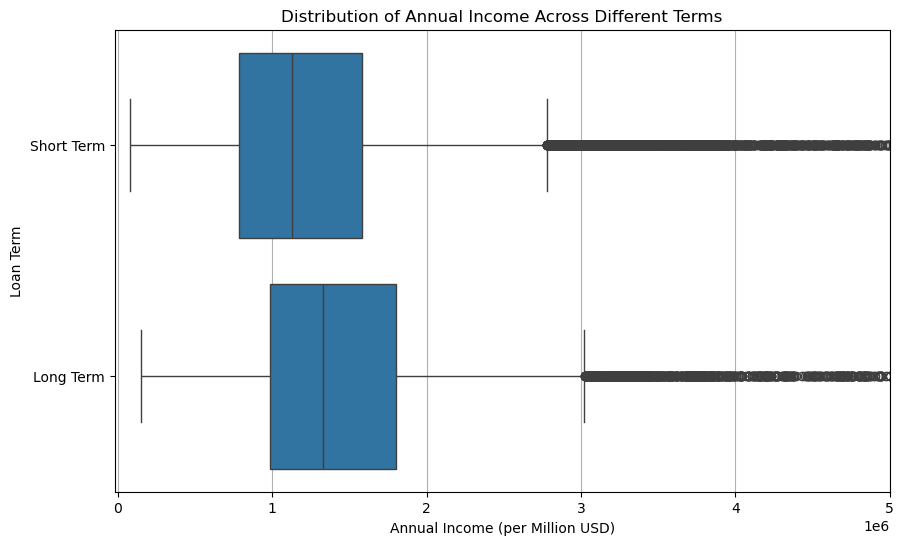

In [276]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df9,x='Annual Income',y='Term')
plt.xlabel('Annual Income (per Million USD)')
plt.ylabel('Loan Term')
plt.xlim(-20000,5000000)     # To not include outliers
plt.grid(axis='x')       # Grid Lines for better readability
plt.title('Distribution of Annual Income Across Different Terms')
plt.show()

### Numeric Representation

In [278]:
df9.groupby('Home Ownership')['Current Loan Amount'].describe()

count           mean            std  min       25%  \
Home Ownership                                                         
HaveMortgage      185.0  104680.400000   98913.199921  0.0   33770.0   
Home Mortgage   39089.0  301853.723196  219598.867028  0.0  131428.0   
Own Home         7480.0  257700.758824  200350.536967  0.0  109378.5   
Rent            34092.0  236239.467910  182991.019146  0.0  105374.5   

                     50%       75%       max  
Home Ownership                                
HaveMortgage     89892.0  133848.0  733106.0  
Home Mortgage   268972.0  445236.0  789250.0  
Own Home        221232.0  375694.0  789030.0  
Rent            215754.0  335852.0  789250.0

## 28) How does the credit score vary with the number of credit problems?

In [280]:
df2['Credit Score'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [281]:
df2['Number of Credit Problems'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

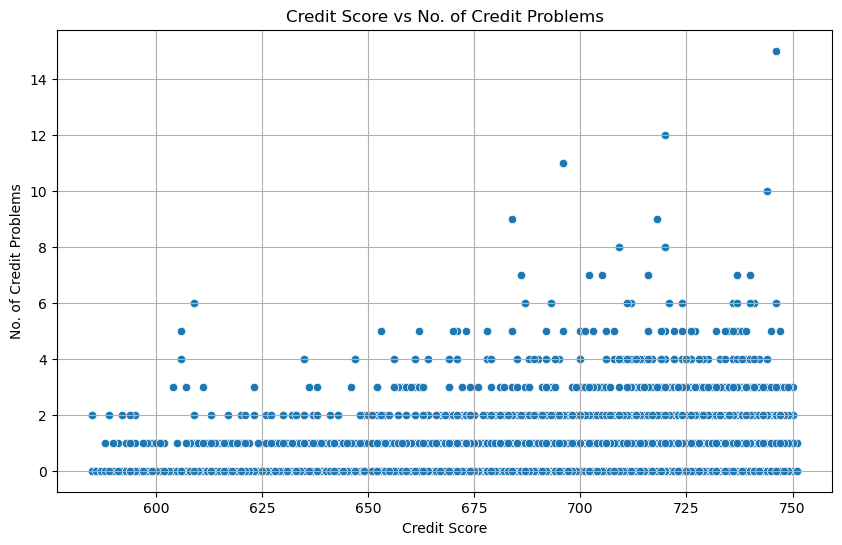

In [282]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='Credit Score',y='Number of Credit Problems')
plt.xlabel('Credit Score')
plt.ylabel('No. of Credit Problems')
plt.grid()  # Grid Lines for better readability
plt.title('Credit Score vs No. of Credit Problems')
plt.show()

In [283]:
df2[['Credit Score','Number of Credit Problems']].corr()

Credit Score  Number of Credit Problems
Credit Score                    1.00000                   -0.04726
Number of Credit Problems      -0.04726                    1.00000

In [284]:
pd.DataFrame(df2[['Credit Score','Number of Credit Problems']].var().round(2))

0
Credit Score               800.73
Number of Credit Problems    0.24

In [285]:
pd.DataFrame(df2[['Credit Score','Number of Credit Problems']].std().round(2))

0
Credit Score               28.30
Number of Credit Problems   0.49

## 29) Is there a correlation between the current loan amount and the number of credit problems?

In [287]:
df1['Current Credit Balance'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [288]:
df1['Number of Credit Problems'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

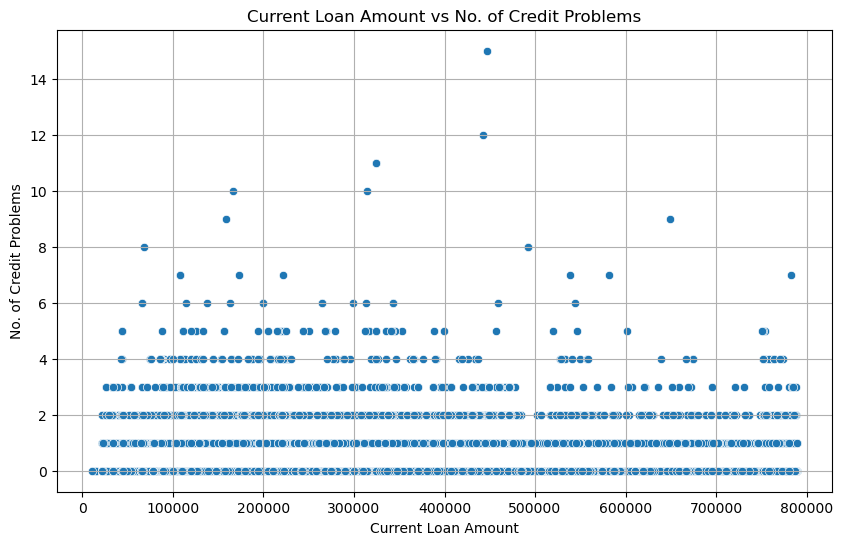

In [289]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1,x='Current Loan Amount',y='Number of Credit Problems')
plt.xlabel('Current Loan Amount')
plt.ylabel('No. of Credit Problems')
plt.grid()      # Grid Lines for better readability
plt.title('Current Loan Amount vs No. of Credit Problems')
plt.show()

In [290]:
df1[['Current Loan Amount','Number of Credit Problems']].corr()

Current Loan Amount  Number of Credit Problems
Current Loan Amount                   1.000000                  -0.076698
Number of Credit Problems            -0.076698                   1.000000

### As the Correlation between Number of Credit Problems and Current Loan Amount is -0.076698, the correlation between them is negligible

## 30) What is the relationship between the number of open accounts and the years of credit history?

In [293]:
df3['Number of Open Accounts'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

In [294]:
df3['Years of Credit History'].isna().unique()

# Using already made up DataFrame and checking null values

array([False])

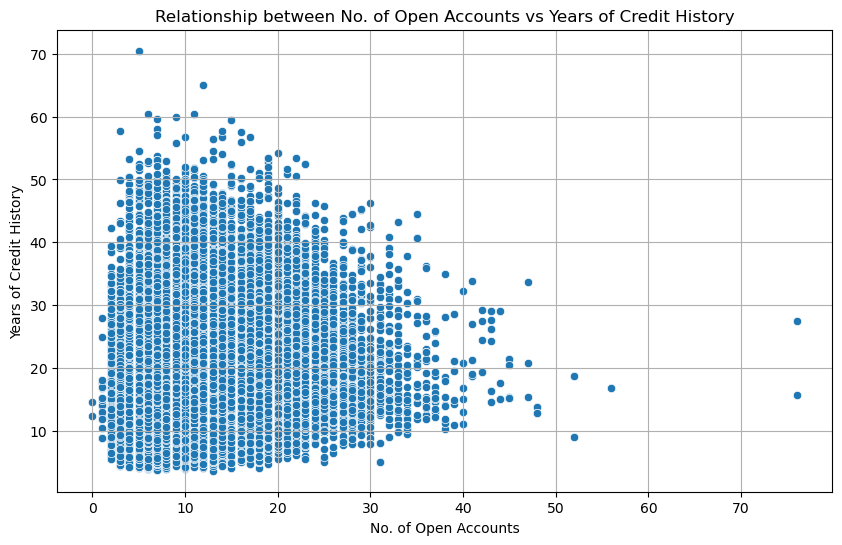

In [295]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df3,x='Number of Open Accounts',y='Years of Credit History')
plt.xlabel('No. of Open Accounts')
plt.ylabel('Years of Credit History')
plt.grid()   # Grid Lines for better readability
plt.title('Relationship between No. of Open Accounts vs Years of Credit History')
plt.show()

In [296]:
df3[['Number of Open Accounts','Years of Credit History']].corr()

Number of Open Accounts  Years of Credit History
Number of Open Accounts                 1.000000                 0.132147
Years of Credit History                 0.132147                 1.000000

### As the Correlation between No. of Open Accounts and Years of Credit History is 0.132349, the correlation between them is negligible